In [ ]:
# Imports
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, mode
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/group_30_prediction.csv')

In [ ]:
df.head()

,CS,LC,HALC
0,0.201898,1.647598,0.147333
1,0.195009,2.799018,0.056821
2,0.758545,51.257881,86.641068
3,0.379999,28.996832,5.745588
4,0.051492,0.115345,0.000189


TypeError: 'Series' object is not callable

In [ ]:
# prompt: get dtype of the columns

df.dtypes


,0
CS,float64
LC,float64
HALC,float64


In [ ]:
#Import Data
import pandas as pd
# Replace the path with the correct location of your file
file_path ='/content/drive/MyDrive/Group_Project/Data/insurance_train.csv'
df = pd.read_csv(file_path)
# Display the first few rows of the dataframe
df.head()

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19,X.20,X.21,X.22,X.23,X.24,X.25,X.26,X.27,X.28
0,34429,01/06/2017,01/06/2017,01/06/2018,29/08/1996,31/05/2016,0,1,1,1,1,1,0,573.07,0.0,0,0,0.00,3,0,0,1994,75,1360,12795.55,4,P,1040
1,5552,19/09/2016,19/09/2018,19/09/2019,30/04/1992,03/08/2010,0,3,1,1,1,0,0,299.19,0.0,0,0,0.00,3,0,0,2004,100,1896,15386.00,5,D,1165
2,47700,08/01/2003,08/01/2018,08/01/2019,23/03/1972,01/02/1998,1,20,2,2,1,0,0,257.66,0.0,0,2,0.13,3,0,0,2002,95,1390,16470.00,5,P,1235
3,25425,01/10/2015,01/10/2018,01/10/2019,05/03/1946,07/08/1964,0,8,2,3,1,0,0,288.70,0.0,0,1,0.00,3,0,0,2010,140,2497,27381.00,5,D,1984
4,4727,26/01/2017,26/01/2018,26/01/2019,25/04/1973,24/07/1998,0,9,1,1,1,0,0,741.16,0.0,0,3,1.08,3,0,0,1998,80,1969,36600.00,3,P,1702


In [ ]:
df[]

SyntaxError: invalid syntax (<ipython-input-6-71f11347ebfc>, line 1)

In [ ]:
# Revised column mapping with original index included in the new name
column_rename_map_with_index = {
    "X.1": "X_1_policy_id",
    "X.2": "X_2_policy_start_date",
    "X.3": "X_3_last_renewal_date",
    "X.4": "X_4_next_renewal_date",
    "X.5": "X_5_dob",
    "X.6": "X_6_license_issue_date",
    "X.7": "X_7_channel_type",
    "X.8": "X_8_years_with_company",
    "X.9": "X_9_total_policies",
    "X.10": "X_10_max_policies",
    "X.11": "X_11_max_products",
    "X.12": "X_12_nonpay_cancellations",
    "X.13": "X_13_payment_method",
    "X.14": "X_14_net_premium",
    "X.15": "X_15_total_claim_cost",
    "X.16": "X_16_num_claims_year",
    "X.17": "X_17_num_claims_total",
    "X.18": "X_18_claim_rate",
    "X.19": "X_19_vehicle_type",
    "X.20": "X_20_region_type",
    "X.21": "X_21_multi_driver",
    "X.22": "X_22_vehicle_reg_year",
    "X.23": "X_23_vehicle_power",
    "X.24": "X_24_cylinder_capacity",
    "X.25": "X_25_market_value",
    "X.26": "X_26_num_doors",
    "X.27": "X_27_fuel_type",
    "X.28": "X_28_vehicle_weight"
}

df.rename(columns=column_rename_map_with_index, inplace=True)

In [ ]:
df['LC'].sum()

np.float64(2614462.93443025)

In [ ]:
df['HALC'].sum()

np.float64(4799265.088311994)

In [ ]:
# set date column to date
date_cols = [
    "X_2_policy_start_date",
    "X_3_last_renewal_date",
    "X_4_next_renewal_date",
    "X_5_dob",
    "X_6_license_issue_date"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

# First, convert relevant columns to numeric for calculation
df["X_15_total_claim_cost"] = pd.to_numeric(df["X_15_total_claim_cost"], errors='coerce')
df["X_16_num_claims_year"] = pd.to_numeric(df["X_16_num_claims_year"], errors='coerce')
df["X_18_claim_rate"] = pd.to_numeric(df["X_18_claim_rate"], errors='coerce')

# Create LC (Loss Cost per Exposure Unit)
df["LC"] = df["X_15_total_claim_cost"] / df["X_16_num_claims_year"]
df["LC"].fillna(0, inplace=True)  # set to 0 where division by zero or missing

# Create HALC (Historically Adjusted Loss Cost)
df["HALC"] = df["LC"] * df["X_18_claim_rate"]
df["HALC"].fillna(0, inplace=True)

# Create CS (Claim Status: 1 if claim occurred, 0 otherwise)
df["CS"] = (df["X_15_total_claim_cost"] > 0).astype(int)

# FIll nulls in fuel column
df["X_27_fuel_type"] = df["X_27_fuel_type"].fillna("Unknown")
df.groupby(["CS", "X_16_num_claims_year"]).size().reset_index(name="count").sort_values(by=["CS", "X_16_num_claims_year"])

,CS,X_16_num_claims_year,count
0,0,0,33300
1,1,1,2334
2,1,2,1014
3,1,3,410
4,1,4,179
5,1,5,89
6,1,6,40
7,1,7,33
8,1,8,16
9,1,9,8


In [ ]:
# Redefine the feature creation function
def create_insurance_features(df):
    date_cols = [
        "X_2_policy_start_date",
        "X_3_last_renewal_date",
        "X_4_next_renewal_date",
        "X_5_dob",
        "X_6_license_issue_date"
    ]

    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

    df["age_at_last_renewal"] = ((df["X_3_last_renewal_date"] - df["X_5_dob"]).dt.days / 365.25).round(1)
    df["driving_experience"] = ((df["X_3_last_renewal_date"] - df["X_6_license_issue_date"]).dt.days / 365.25).round(1)
    df["vehicle_age"] = df["X_3_last_renewal_date"].dt.year - df["X_22_vehicle_reg_year"]
    df["policy_tenure"] = ((df["X_3_last_renewal_date"] - df["X_2_policy_start_date"]).dt.days / 365.25).round(1)
    df["first_policy_age"] = ((df["X_2_policy_start_date"] - df["X_5_dob"]).dt.days / 365.25).round(1)
    #df["claim_frequency_total"] = df["X_17_num_claims_total"] / df["X_8_years_with_company"].replace(0, np.nan)
    df["contract_start_month"] = df["X_2_policy_start_date"].dt.month
    return df

df = create_insurance_features(df)
# Drop date columns
date_cols_to_drop = [
    "X_2_policy_start_date", "X_3_last_renewal_date", "X_4_next_renewal_date",
    "X_5_dob", "X_6_license_issue_date"]
df = df.drop(columns=date_cols_to_drop, errors='ignore')
# One-hot encode 'engine_power_class' and 'X_27_fuel_type'
df = pd.get_dummies(df, columns=["X_27_fuel_type", "X_19_vehicle_type"], drop_first=True)
df.set_index("X_1_policy_id", inplace=True)
df.head(2)
import pandas as pd

# Ensure LC and HALC are already computed in your DataFrame
# LC = X.15 / X.16
# HALC = (X.15 / X.16) * X.18

def create_strata_column(df):
    # Step 1: Initialize LC_bin and HALC_bin as empty
    df['LC_bin'] = None
    df['HALC_bin'] = None

    # Step 2: Bin LC and HALC using quantiles only for CS == 1
    df.loc[df['CS'] == 1, 'LC_bin'] = pd.qcut(
        df.loc[df['CS'] == 1, 'LC'],
        q=3,
        duplicates='drop'
    )
    df.loc[df['CS'] == 1, 'HALC_bin'] = pd.qcut(
        df.loc[df['CS'] == 1, 'HALC'],
        q=3,
        duplicates='drop'
    )

    # Step 3: Convert bins to string
    df['LC_bin'] = df['LC_bin'].astype(str)
    df['HALC_bin'] = df['HALC_bin'].astype(str)

    # Step 4: For CS == 0, assign 'zero' bins
    df.loc[df['CS'] == 0, 'LC_bin'] = 'zero'
    df.loc[df['CS'] == 0, 'HALC_bin'] = 'zero'

    # Step 5: Combine all into strata
    df['strata'] = df['CS'].astype(str) + '_' + df['LC_bin'] + '_' + df['HALC_bin']

    return df

# Example usage:
df = create_strata_column(df)

,X_7_channel_type,X_8_years_with_company,X_9_total_policies,X_10_max_policies,X_11_max_products,X_12_nonpay_cancellations,X_13_payment_method,X_14_net_premium,X_15_total_claim_cost,X_16_num_claims_year,X_17_num_claims_total,X_18_claim_rate,X_20_region_type,X_21_multi_driver,X_22_vehicle_reg_year,X_23_vehicle_power,X_24_cylinder_capacity,X_25_market_value,X_26_num_doors,X_28_vehicle_weight,LC,HALC,CS,age_at_last_renewal,driving_experience,vehicle_age,policy_tenure,first_policy_age,contract_start_month,X_27_fuel_type_P,X_27_fuel_type_Unknown,X_19_vehicle_type_2,X_19_vehicle_type_3,X_19_vehicle_type_4
X_1_policy_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34429,0,1,1,1,1,1,0,573.07,0.0,0,0,0.0,0,0,1994,75,1360,12795.55,4,1040,0.0,0.0,0,20.8,1.0,23,0.0,20.8,6,True,False,False,True,False
5552,0,3,1,1,1,0,0,299.19,0.0,0,0,0.0,0,0,2004,100,1896,15386.00,5,1165,0.0,0.0,0,26.4,8.1,14,2.0,24.4,9,False,False,False,True,False


In [ ]:
df.head(2)

,X_7_channel_type,X_8_years_with_company,X_9_total_policies,X_10_max_policies,X_11_max_products,X_12_nonpay_cancellations,X_13_payment_method,X_14_net_premium,X_15_total_claim_cost,X_16_num_claims_year,X_17_num_claims_total,X_18_claim_rate,X_20_region_type,X_21_multi_driver,X_22_vehicle_reg_year,X_23_vehicle_power,X_24_cylinder_capacity,X_25_market_value,X_26_num_doors,X_28_vehicle_weight,LC,HALC,CS,age_at_last_renewal,driving_experience,vehicle_age,policy_tenure,first_policy_age,contract_start_month,X_27_fuel_type_P,X_27_fuel_type_Unknown,X_19_vehicle_type_2,X_19_vehicle_type_3,X_19_vehicle_type_4,LC_bin,HALC_bin,strata
X_1_policy_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34429,0,1,1,1,1,1,0,573.07,0.0,0,0,0.0,0,0,1994,75,1360,12795.55,4,1040,0.0,0.0,0,20.8,1.0,23,0.0,20.8,6,True,False,False,True,False,zero,zero,0_zero_zero
5552,0,3,1,1,1,0,0,299.19,0.0,0,0,0.0,0,0,2004,100,1896,15386.00,5,1165,0.0,0.0,0,26.4,8.1,14,2.0,24.4,9,False,False,False,True,False,zero,zero,0_zero_zero


In [ ]:
df['strata'].value_counts()

,count
strata,
0_zero_zero,33300
"1_(440.077, 118142.59]_(684.071, 236285.18]",1168
"1_(4.005999999999999, 95.1]_(-0.001, 157.455]",1111
"1_(95.1, 440.077]_(157.455, 684.071]",909
"1_(4.005999999999999, 95.1]_(157.455, 684.071]",276
"1_(95.1, 440.077]_(-0.001, 157.455]",255
"1_(95.1, 440.077]_(684.071, 236285.18]",216
"1_(440.077, 118142.59]_(157.455, 684.071]",198
"1_(440.077, 118142.59]_(-0.001, 157.455]",18


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 25.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define features and target
X = df.drop(columns=["CS", "X_15_total_claim_cost", "X_16_num_claims_year", "X_17_num_claims_total",
                     "X_18_claim_rate", "X_22_vehicle_reg_year", "LC", "HALC", "LC_bin", "HALC_bin", "strata"])
y = df["CS"]
strata_col = df["strata"]

# Define models
models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Gradient Boost": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Prepare result storage
results = {name: {"AUC": [], "Acc": [], "Prec": [], "Rec": [], "F1": [], "FPR": [], "TPR": []} for name in models}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_idx, test_idx in skf.split(X, strata_col):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Metrics
        auc = roc_auc_score(y_test, y_prob)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        # Save results
        results[name]["AUC"].append(auc)
        results[name]["Acc"].append(acc)
        results[name]["Prec"].append(prec)
        results[name]["Rec"].append(rec)
        results[name]["F1"].append(f1)
        results[name]["FPR"].append(fpr)
        results[name]["TPR"].append(tpr)

# Aggregate results
summary_data = []
for name, metrics in results.items():
    summary_data.append({
        "Model": name,
        "AUC": np.mean(metrics["AUC"]),
        "Acc": np.mean(metrics["Acc"]),
        "Prec": np.mean(metrics["Prec"]),
        "Rec": np.mean(metrics["Rec"]),
        "F1": np.mean(metrics["F1"]),
    })

summary_df = pd.DataFrame(summary_data)


LogisticRegression(max_iter=1000)

SVC(probability=True)

GradientBoostingClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

[LightGBM] [Info] Number of positive: 2767, number of negative: 22200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2218
[LightGBM] [Info] Number of data points in the train set: 24967, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110826 -> initscore=-2.082329
[LightGBM] [Info] Start training from score -2.082329


LGBMClassifier()

DecisionTreeClassifier()

RandomForestClassifier()

LogisticRegression(max_iter=1000)

SVC(probability=True)

GradientBoostingClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

[LightGBM] [Info] Number of positive: 2767, number of negative: 22200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2216
[LightGBM] [Info] Number of data points in the train set: 24967, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110826 -> initscore=-2.082329
[LightGBM] [Info] Start training from score -2.082329


LGBMClassifier()

DecisionTreeClassifier()

RandomForestClassifier()

LogisticRegression(max_iter=1000)

SVC(probability=True)

GradientBoostingClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

[LightGBM] [Info] Number of positive: 2768, number of negative: 22200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2213
[LightGBM] [Info] Number of data points in the train set: 24968, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110862 -> initscore=-2.081967
[LightGBM] [Info] Start training from score -2.081967


LGBMClassifier()

DecisionTreeClassifier()

RandomForestClassifier()

<Figure size 1000x800 with 0 Axes>

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Combined AUC Curves for All Models')

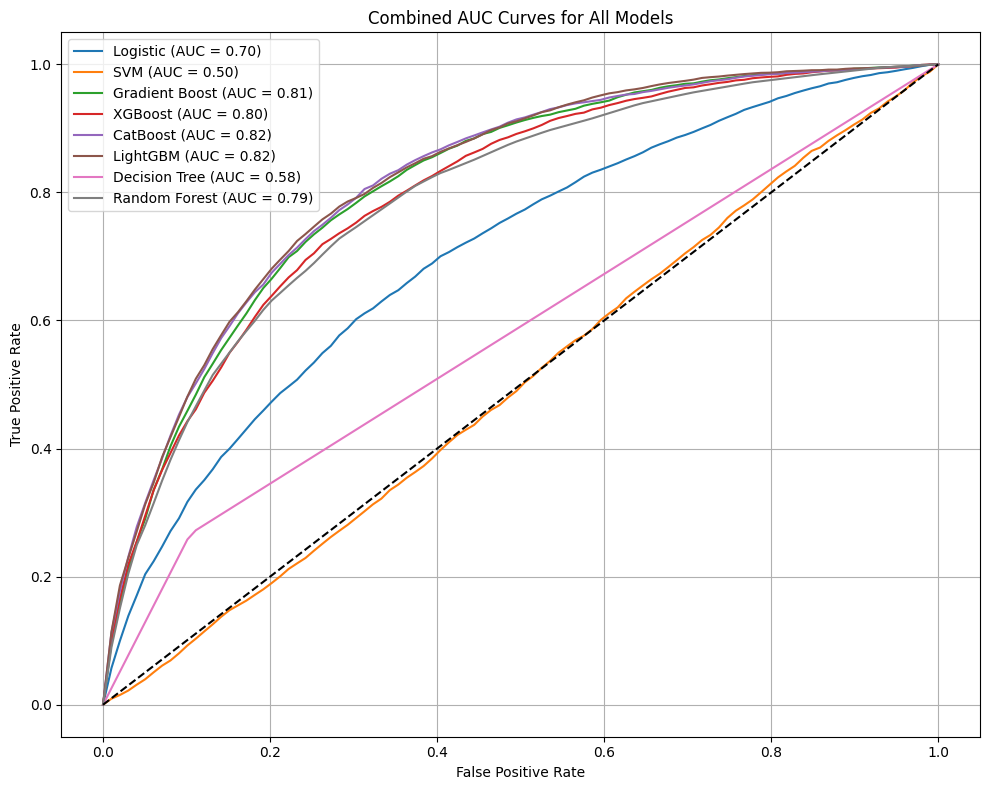

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Create a common FPR range
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))

for name, metrics in results.items():
    interp_tprs = []

    for fpr, tpr in zip(metrics["FPR"], metrics["TPR"]):
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0  # Ensure the curve starts at 0
        interp_tprs.append(interp_tpr)

    mean_tpr = np.mean(interp_tprs, axis=0)
    mean_tpr[-1] = 1.0  # Ensure the curve ends at 1
    mean_auc = np.mean(metrics["AUC"])

    plt.plot(mean_fpr, mean_tpr, label=f"{name} (AUC = {mean_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined AUC Curves for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [ ]:
summary_df

,Model,AUC,Acc,Prec,Rec,F1
0,Logistic,0.703492,0.889322,0.551587,0.008191,0.016130
1,SVM,0.499177,0.889162,0.000000,0.000000,0.000000
2,Gradient Boost,0.813149,0.891485,0.583530,0.074439,0.131995
3,XGBoost,0.799622,0.890043,0.512464,0.161644,0.245548
4,CatBoost,0.818876,0.892660,0.581312,0.112743,0.188830
5,LightGBM,0.820727,0.893167,0.600108,0.109129,0.184600
6,Decision Tree,0.581255,0.825719,0.241441,0.267165,0.253647
7,Random Forest,0.792467,0.890337,0.565908,0.044086,0.081770


In [ ]:
# Example
X = df.drop(columns=["CS", "X_15_total_claim_cost", "X_16_num_claims_year", "X_17_num_claims_total", "X_18_claim_rate","X_22_vehicle_reg_year", "LC", "HALC", "LC_bin", "HALC_bin",'strata'])
y = df["CS"]
strata_col = df["strata"]

result = tune_catboost_with_feature_selection(X, y, strata_col, n_trials=50)

[I 2025-05-07 00:39:50,546] A new study created in memory with name: no-name-2a134c06-3f0d-4aa0-ac18-2aab1b95f263
[I 2025-05-07 00:39:57,929] Trial 0 finished with value: 0.749026216172977 and parameters: {'use_X_7_channel_type': 0, 'use_X_8_years_with_company': 1, 'use_X_9_total_policies': 0, 'use_X_10_max_policies': 0, 'use_X_11_max_products': 0, 'use_X_12_nonpay_cancellations': 0, 'use_X_13_payment_method': 0, 'use_X_14_net_premium': 1, 'use_X_20_region_type': 1, 'use_X_21_multi_driver': 0, 'use_X_23_vehicle_power': 1, 'use_X_24_cylinder_capacity': 1, 'use_X_25_market_value': 0, 'use_X_26_num_doors': 1, 'use_X_28_vehicle_weight': 0, 'use_age_at_last_renewal': 0, 'use_driving_experience': 1, 'use_vehicle_age': 0, 'use_policy_tenure': 1, 'use_first_policy_age': 1, 'use_contract_start_month': 0, 'use_X_27_fuel_type_P': 0, 'use_X_27_fuel_type_Unknown': 0, 'use_X_19_vehicle_type_2': 0, 'use_X_19_vehicle_type_3': 1, 'use_X_19_vehicle_type_4': 1, 'iterations': 662, 'depth': 5, 'learning_ra


Best Trial:
AUC: 0.8143
Selected Features: ['X_7_channel_type', 'X_8_years_with_company', 'X_9_total_policies', 'X_10_max_policies', 'X_11_max_products', 'X_12_nonpay_cancellations', 'X_13_payment_method', 'X_14_net_premium', 'X_20_region_type', 'X_21_multi_driver', 'X_23_vehicle_power', 'X_24_cylinder_capacity', 'X_26_num_doors', 'driving_experience', 'policy_tenure', 'contract_start_month', 'X_27_fuel_type_P', 'X_27_fuel_type_Unknown', 'X_19_vehicle_type_2']
CatBoost Hyperparameters: {'iterations': 890, 'depth': 5, 'learning_rate': 0.06209161650306317, 'l2_leaf_reg': 2.7111989338188773, 'border_count': 97, 'random_strength': 8.173243980892623, 'bagging_temperature': 0.6666430773430065, 'scale_pos_weight': 7.590358421201677}


In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

def tune_catboost_with_feature_selection(X, y, strata_col, n_trials=50, random_state=42):
    feature_names = list(X.columns)

    def objective(trial):
        # Feature selection step
        selected = [trial.suggest_int(f"use_{col}", 0, 1) for col in feature_names]
        if sum(selected) == 0:
            return 0.0  # skip empty feature sets
        selected_features = [f for f, use in zip(feature_names, selected) if use]
        X_sel = X[selected_features]

        # CatBoost hyperparameter tuning
        params = {
            'iterations': trial.suggest_int('iterations', 200, 1000),
            'depth': trial.suggest_int('depth', 4, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
            'border_count': trial.suggest_int('border_count', 32, 255),
            'random_strength': trial.suggest_float('random_strength', 1e-9, 10.0),
            'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
            'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 10.0),
            'verbose': 0,
            'random_seed': random_state,
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'task_type': 'CPU'  # Change to 'GPU' if needed
        }

        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)
        aucs = []

        for train_idx, val_idx in skf.split(X_sel, strata_col):
            X_train, X_val = X_sel.iloc[train_idx], X_sel.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model = CatBoostClassifier(**params)
            model.fit(X_train, y_train)
            preds = model.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, preds)
            aucs.append(auc)

        return np.mean(aucs)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    # Extract selected features
    best_params = study.best_trial.params
    selected_features = [f for f in feature_names if best_params.get(f"use_{f}", 0) == 1]
    catboost_params = {k: v for k, v in best_params.items() if not k.startswith("use_")}

    print("\nBest Trial:")
    print(f"AUC: {study.best_value:.4f}")
    print("Selected Features:", selected_features)
    print("CatBoost Hyperparameters:", catboost_params)

    return {
        "best_auc": study.best_value,
        "selected_features": selected_features,
        "catboost_params": catboost_params,
        "study": study
    }

In [ ]:
import json

# Save to a JSON file
with open("best_catboost_config_fold.json", "w") as f:
    json.dump({
        "AUC": result["best_auc"],
        "SelectedFeatures": result["selected_features"],
        "CatBoostParams": result["catboost_params"]
    }, f, indent=4)

In [ ]:
import json # Load from JSON
with open("best_catboost_config_fold.json", "r") as f:
    config = json.load(f)

In [ ]:
features = config["SelectedFeatures"]
params = config["CatBoostParams"]

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

def get_oof_probs_and_metrics(X, y, strata_col, best_params, selected_features):
    n_splits = 3
    oof_preds = np.zeros(len(X))
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    all_y_true = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, strata_col)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = CatBoostClassifier(**best_params)
        model.fit(X_train[selected_features], y_train,
                  eval_set=(X_val[selected_features], y_val),
                  early_stopping_rounds=30,
                  verbose=False)

        preds_proba = model.predict_proba(X_val[selected_features])[:, 1]
        oof_preds[val_idx] = preds_proba
        all_y_true.extend(y_val)

        auc = roc_auc_score(y_val, preds_proba)
        preds_label = (preds_proba >= 0.5).astype(int)
        acc = accuracy_score(y_val, preds_label)
        prec = precision_score(y_val, preds_label, zero_division=0)
        rec = recall_score(y_val, preds_label)

        print(f"[Fold {fold+1}] AUC: {auc:.4f}, Accuracy: {acc:.4f}, "
              f"Precision: {prec:.4f}, Recall: {rec:.4f}")

    # Overall metrics
    oof_labels = (oof_preds >= 0.5).astype(int)
    auc = roc_auc_score(y, oof_preds)
    acc = accuracy_score(y, oof_labels)
    prec = precision_score(y, oof_labels, zero_division=0)
    rec = recall_score(y, oof_labels)
    f1 = f1_score(y, oof_labels)

    print("\n[Overall Performance]")
    print(f"AUC: {auc:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return oof_preds

In [ ]:
oof_preds = get_oof_probs_and_metrics(X, y, strata_col, best_params=result['catboost_params'], selected_features=result['selected_features'])

[Fold 1] AUC: 0.8209, Accuracy: 0.7526, Precision: 0.2738, Recall: 0.7457
[Fold 2] AUC: 0.8212, Accuracy: 0.7526, Precision: 0.2706, Recall: 0.7269
[Fold 3] AUC: 0.8225, Accuracy: 0.7560, Precision: 0.2777, Recall: 0.7513

[Overall Performance]
AUC: 0.8216
Accuracy: 0.7537
Precision: 0.2741
Recall: 0.7413
F1 Score: 0.4002


In [ ]:
X = df.drop(columns=["CS", "X_15_total_claim_cost", "X_16_num_claims_year", "X_17_num_claims_total", "X_18_claim_rate","X_22_vehicle_reg_year", "LC", "HALC", "LC_bin", "HALC_bin",'strata'])
y = df["CS"]
strata_col = df["strata"]

In [ ]:
pip install lightgbm

In [ ]:
def run_lc_regression_pipeline(df, include_lightgbm=False):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import StratifiedKFold
    from sklearn.linear_model import TweedieRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from xgboost import XGBRegressor
    from sklearn.metrics import mean_squared_error

    if include_lightgbm:
        try:
            from lightgbm import LGBMRegressor
        except ImportError:
            print("LightGBM not installed. Proceeding without it.")
            include_lightgbm = False

    drop_cols = ["CS", "X_15_total_claim_cost", "X_16_num_claims_year", "X_17_num_claims_total",
                 "X_18_claim_rate", "X_22_vehicle_reg_year", "LC", "HALC", "LC_bin", "HALC_bin", "strata"]
    drop_cols = [col for col in drop_cols if col in df.columns]
    X = df.drop(columns=drop_cols)
    y = df["LC"]
    strata = df["strata"]

    # Models
    models = {
        "Tweedie GLM": TweedieRegressor(power=1.5, alpha=0.0),
        "XGBoost Tweedie": XGBRegressor(objective="reg:tweedie", tweedie_variance_power=1.5, eval_metric="rmse"),
        "Gradient Boosting": GradientBoostingRegressor(loss="squared_error")
    }

    if include_lightgbm:
        models["LightGBM Tweedie"] = LGBMRegressor(objective="tweedie", tweedie_variance_power=1.5)

    results = {name: [] for name in models}
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, strata), 1):
        print(f"\nFold {fold} results:")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        for name, model in models.items():
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, preds))
            results[name].append(rmse)
            print(f"{name}: RMSE = {rmse:.4f}")

    # Summary
    summary = pd.DataFrame([
        {"Model": name, "Fold 1 RMSE": rmses[0], "Fold 2 RMSE": rmses[1], "Fold 3 RMSE": rmses[2], "Avg RMSE": np.mean(rmses)}
        for name, rmses in results.items()
    ])

    # Plot
    plt.figure(figsize=(8, 6))
    plt.bar(summary["Model"], summary["Avg RMSE"])
    plt.ylabel("RMSE")
    plt.title("Average RMSE of Regression Models (3-fold CV)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("regression_rmse_bar_chart.png")

    return summary



Fold 1 results:
Tweedie GLM: RMSE = 525.7910
XGBoost Tweedie: RMSE = 525.9248
Gradient Boosting: RMSE = 552.7606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2473
[LightGBM] [Info] Number of data points in the train set: 24967, number of used features: 27
[LightGBM] [Info] Start training from score 4.276600
LightGBM Tweedie: RMSE = 523.2550

Fold 2 results:
Tweedie GLM: RMSE = 693.6222
XGBoost Tweedie: RMSE = 693.5956
Gradient Boosting: RMSE = 1051.0686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2471
[LightGBM] [Info] Number of data points in the train set: 24967, number

,Model,Fold 1 RMSE,Fold 2 RMSE,Fold 3 RMSE,Avg RMSE
0,Tweedie GLM,525.791017,693.622166,1162.993126,794.135436
1,XGBoost Tweedie,525.924846,693.595583,1161.767829,793.762753
2,Gradient Boosting,552.760559,1051.068634,1164.037780,922.622324
3,LightGBM Tweedie,523.255026,691.181156,1160.066676,791.500952


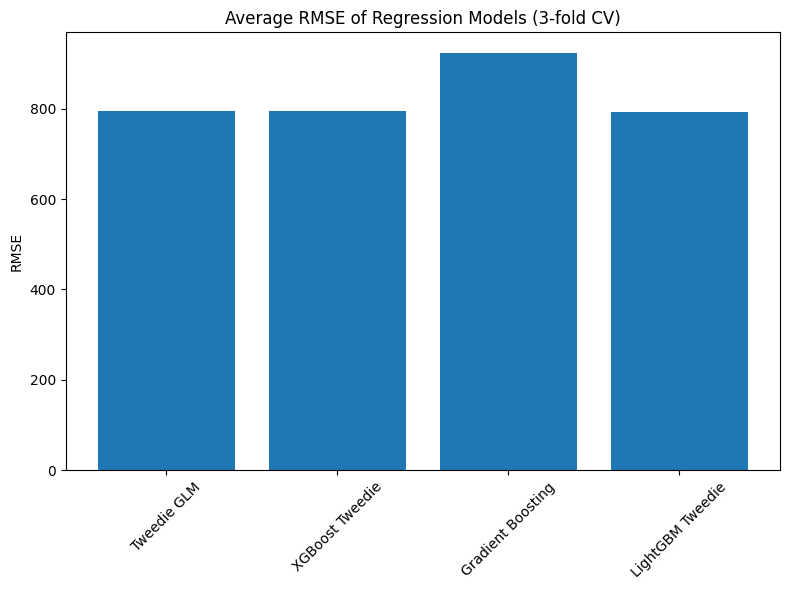

In [ ]:
# Call the function
summary_df = run_lc_regression_pipeline(df,include_lightgbm=True)
summary_df

In [ ]:
features = ['X_7_channel_type', 'X_8_years_with_company', 'X_9_total_policies', 'X_10_max_policies',
            'X_11_max_products', 'X_12_nonpay_cancellations', 'X_13_payment_method', 'X_14_net_premium',
            'X_20_region_type', 'X_21_multi_driver', 'X_23_vehicle_power', 'X_24_cylinder_capacity',
            'X_26_num_doors', 'driving_experience', 'policy_tenure', 'contract_start_month',
            'X_27_fuel_type_P', 'X_27_fuel_type_Unknown', 'X_19_vehicle_type_2']

params = {
    'iterations': 890,
    'depth': 5,
    'learning_rate': 0.06209161650306317,
    'l2_leaf_reg': 2.7111989338188773,
    'border_count': 97,
    'random_strength': 8.173243980892623,
    'bagging_temperature': 0.6666430773430065,
    'scale_pos_weight': 7.590358421201677
}

oof_preds = get_oof_probs_and_metrics(X, y, strata_col, best_params=params, selected_features=features)

[Fold 1] AUC: 0.8202, Accuracy: 0.7535, Precision: 0.2737, Recall: 0.7399
[Fold 2] AUC: 0.8189, Accuracy: 0.7520, Precision: 0.2691, Recall: 0.7211
[Fold 3] AUC: 0.8244, Accuracy: 0.7598, Precision: 0.2802, Recall: 0.7440

[Overall Performance]
AUC: 0.8212
Accuracy: 0.7551
Precision: 0.2743
Recall: 0.7350
F1 Score: 0.3995


In [ ]:
df["p_cs_1"] = oof_preds

In [ ]:
df[['p_cs_1','LC','HALC','CS']].head(50)

,p_cs_1,LC,HALC,CS
X_1_policy_id,,,,
34429,0.619372,0.000,0.0000,0
5552,0.302561,0.000,0.0000,0
47700,0.276495,0.000,0.0000,0
25425,0.080199,0.000,0.0000,0
4727,0.752752,0.000,0.0000,0
1752,0.119979,0.000,0.0000,0
39480,0.215255,0.000,0.0000,0
45018,0.050275,0.000,0.0000,0
2943,0.482597,0.000,0.0000,0


In [ ]:
X_full = df[features]
y_full = df["CS"]  # or whatever your classification label is

In [ ]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37451 entries, 34429 to 24104
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X_7_channel_type           37451 non-null  int64  
 1   X_8_years_with_company     37451 non-null  int64  
 2   X_9_total_policies         37451 non-null  int64  
 3   X_10_max_policies          37451 non-null  int64  
 4   X_11_max_products          37451 non-null  int64  
 5   X_12_nonpay_cancellations  37451 non-null  int64  
 6   X_13_payment_method        37451 non-null  int64  
 7   X_14_net_premium           37451 non-null  float64
 8   X_20_region_type           37451 non-null  int64  
 9   X_21_multi_driver          37451 non-null  int64  
 10  X_23_vehicle_power         37451 non-null  int64  
 11  X_24_cylinder_capacity     37451 non-null  int64  
 12  X_26_num_doors             37451 non-null  int64  
 13  driving_experience         37451 non-null  floa

In [ ]:
from catboost import CatBoostClassifier

final_model = CatBoostClassifier(
    **params,
    eval_metric="AUC",
    verbose=False,
    random_seed=42
)

final_model.fit(X_full, y_full)

In [ ]:
final_model.save_model("final_catboost_model_FULL_FINAL.cbm")

In [ ]:
feature_names = X_full.columns.tolist()
importances = final_model.get_feature_importance()

feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Save to CSV (optional)
feat_imp_df.to_csv("catboost_feature_importance.csv", index=False)

# View top features
print(feat_imp_df.head(100))

                      Feature  Importance
14              policy_tenure   17.361644
15       contract_start_month   13.723661
1      X_8_years_with_company   12.585342
7            X_14_net_premium    8.467375
11     X_24_cylinder_capacity    8.437785
5   X_12_nonpay_cancellations    7.804024
13         driving_experience    7.784287
10         X_23_vehicle_power    6.250963
3           X_10_max_policies    4.321831
2          X_9_total_policies    3.596894
6         X_13_payment_method    2.969985
12             X_26_num_doors    2.173595
0            X_7_channel_type    0.948433
4           X_11_max_products    0.885476
8            X_20_region_type    0.809198
18        X_19_vehicle_type_2    0.661412
9           X_21_multi_driver    0.589730
16           X_27_fuel_type_P    0.574010
17     X_27_fuel_type_Unknown    0.054355


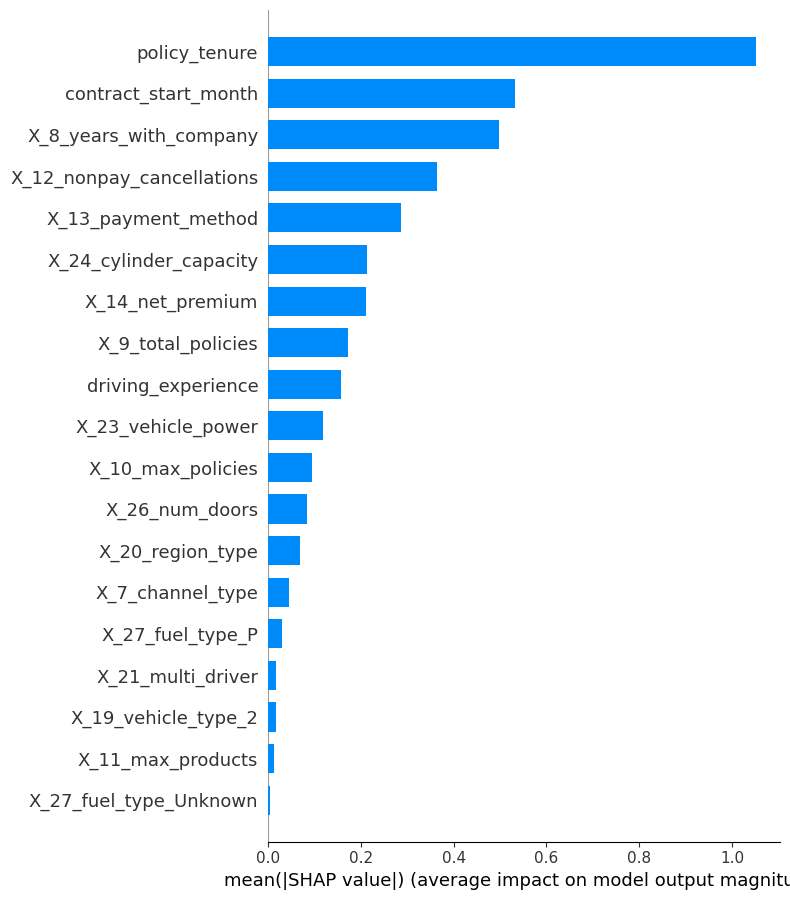

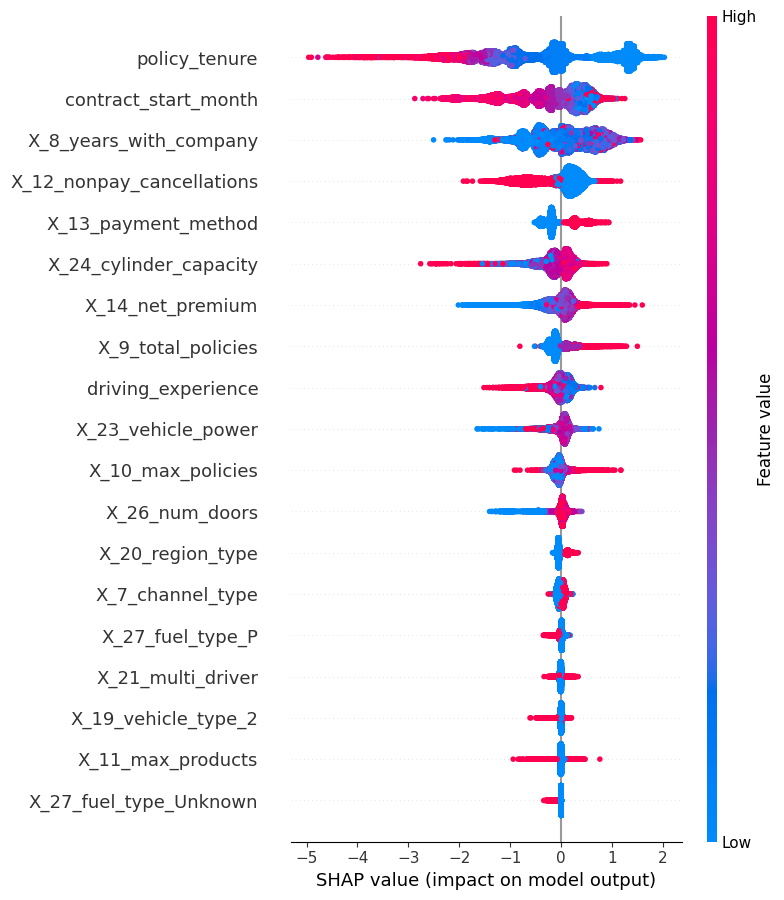

In [ ]:
import shap
# Define the SHAP explainer
explainer = shap.Explainer(final_model)
# Compute SHAP values
shap_values = explainer.shap_values(X_full)

# If it's a list, get the positive class (class 1)
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]
else:
    shap_values_to_plot = shap_values

# Plot global bar summary
shap.summary_plot(shap_values_to_plot, X_full, plot_type="bar")

# Plot global beeswarm
shap.summary_plot(shap_values_to_plot, X_full)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37451 entries, 34429 to 24104
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X_7_channel_type           37451 non-null  int64  
 1   X_8_years_with_company     37451 non-null  int64  
 2   X_9_total_policies         37451 non-null  int64  
 3   X_10_max_policies          37451 non-null  int64  
 4   X_11_max_products          37451 non-null  int64  
 5   X_12_nonpay_cancellations  37451 non-null  int64  
 6   X_13_payment_method        37451 non-null  int64  
 7   X_14_net_premium           37451 non-null  float64
 8   X_15_total_claim_cost      37451 non-null  float64
 9   X_16_num_claims_year       37451 non-null  int64  
 10  X_17_num_claims_total      37451 non-null  int64  
 11  X_18_claim_rate            37451 non-null  float64
 12  X_20_region_type           37451 non-null  int64  
 13  X_21_multi_driver          37451 non-null  int6

In [ ]:
# prompt: create a new df where we have p_cs_1 > 0.3 and then show distribution of LC and HALC, not in plot but value counts of how many 0 and how many above 0

# Assuming 'df' and 'oof_preds' are already defined from the previous code.

# Create a new DataFrame with p_cs_1 > 0.3
new_df = df[df['p_cs_1'] < 0.7]

# Show the distribution of LC and HALC (value counts)
print("LC Distribution:")
print(new_df['LC'].value_counts(bins=[-float('inf'), 0, float('inf')])) #bins=[0,0.001, float('inf')]

print("\nHALC Distribution:")
print(new_df['HALC'].value_counts(bins=[-float('inf'), 0, float('inf')])) #bins=[0, 0.001, float('inf')]


LC Distribution:
(-inf, 0.0]    30324
(0.0, inf]      2337
Name: count, dtype: int64

HALC Distribution:
(-inf, 0.0]    30330
(0.0, inf]      2331
Name: count, dtype: int64


In [ ]:
def run_lgbm_tweedie_cv_with_optuna_and_bagged_output(
    X, y,
    strata,
    power_range=(1.1, 1.9),
    n_trials=20,
    n_splits=3,
    early_stopping_rounds=50,
    num_boost_round=1000,
    feature_importance_threshold=1.0
):
    import pandas as pd
    import numpy as np
    import lightgbm as lgb
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import mean_squared_error
    import optuna

    def objective(trial):
        features = list(X.columns)

        params = {
            'objective': 'tweedie',
            'metric': 'rmse',
            'tweedie_variance_power': trial.suggest_float("tweedie_power", power_range[0], power_range[1]),
            'boosting_type': 'gbdt',
            'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.1),
            'num_leaves': trial.suggest_int("num_leaves", 31, 256),
            'bagging_fraction': trial.suggest_float("bagging_fraction", 0.6, 1.0),
            'bagging_freq': 1,
            'feature_fraction': trial.suggest_float("feature_fraction", 0.6, 1.0),
            'verbosity': -1,
            'seed': 42
        }

        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        rmse_list = []

        for train_idx, val_idx in skf.split(X, strata):
            X_train, X_val = X.iloc[train_idx][features], X.iloc[val_idx][features]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            model = lgb.train(
                params,
                lgb.Dataset(X_train, y_train),
                valid_sets=[lgb.Dataset(X_val, y_val)],
                num_boost_round=num_boost_round,
                callbacks=[lgb.early_stopping(early_stopping_rounds)],
            )

            preds = model.predict(X_val)
            rmse = np.sqrt(mean_squared_error(y_val, preds))
            rmse_list.append(rmse)

        return np.mean(rmse_list)

    # Step 1: Hyperparameter Tuning
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)
    best_params = study.best_params
    best_params.update({
        'objective': 'tweedie',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'verbosity': -1,
        'seed': 42
    })

    print("\n✅ Best Hyperparameters Found:", best_params)

    # Step 2: Cross-validated feature importance using StratifiedKFold
    print("\n🔎 Computing cross-validated feature importances using stratified 3-fold split...")

    features = list(X.columns)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    all_importances = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, strata)):
        X_train, X_val = X.iloc[train_idx][features], X.iloc[val_idx][features]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = lgb.train(
            best_params,
            lgb.Dataset(X_train, y_train),
            valid_sets=[lgb.Dataset(X_val, y_val)],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds),
                lgb.log_evaluation(0)
            ]
        )

        imp_df = pd.DataFrame({
            "feature": model.feature_name(),
            "importance": model.feature_importance(importance_type="gain")
        })
        all_importances.append(imp_df)

    avg_importances = pd.concat(all_importances).groupby("feature").mean().sort_values("importance", ascending=False)
    selected_features = avg_importances[avg_importances["importance"] >= feature_importance_threshold].index.tolist()

    print(f"\n📌 Selected {len(selected_features)} features with average importance ≥ {feature_importance_threshold}")

    # Step 3: Final 3-Fold Stratified Training with selected features
    models, metrics, fold_predictions, feature_importances = [], [], [], []
    bagged_preds = np.zeros(len(X))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, strata)):
        print(f"\n🔁 Fold {fold+1}")
        X_train, X_val = X.iloc[train_idx][selected_features], X.iloc[val_idx][selected_features]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = lgb.train(
            best_params,
            lgb.Dataset(X_train, y_train),
            valid_sets=[lgb.Dataset(X_val, y_val)],
            num_boost_round=num_boost_round,
            callbacks=[
                lgb.early_stopping(early_stopping_rounds),
                lgb.log_evaluation(100)
            ]
        )

        preds = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, preds))
        print(f"✅ Fold {fold+1} RMSE: {rmse:.4f}")
        metrics.append(rmse)
        models.append(model)

        bagged_preds[val_idx] = preds
        fold_predictions.append(pd.DataFrame({
            "index": X.iloc[val_idx].index,
            "y_true": y_val.values,
            "y_pred": preds,
            "fold": fold+1
        }))

        feature_importances.append(pd.DataFrame({
            "feature": model.feature_name(),
            "importance": model.feature_importance(importance_type="gain")
        }))

    predictions_df = pd.concat(fold_predictions).set_index("index").sort_index()
    all_fold_importances = pd.concat(feature_importances)
    mean_importances = all_fold_importances.groupby("feature").mean().sort_values("importance", ascending=False)

    data_with_preds = X[selected_features].copy()
    data_with_preds["y_true"] = y.values
    data_with_preds["bagged_pred"] = bagged_preds
    final_rmse = np.sqrt(mean_squared_error(y, bagged_preds))
    print(f"\n📉 Final Bagged RMSE across all folds (using selected features): {final_rmse:.4f}")

    return models, data_with_preds, metrics, final_rmse, mean_importances, selected_features, best_params

In [ ]:
X_lc = df.drop(columns=[
    "CS", "X_15_total_claim_cost", "X_16_num_claims_year", "X_17_num_claims_total",
    "X_18_claim_rate", "X_22_vehicle_reg_year", "LC", "HALC", "LC_bin", "HALC_bin", "strata"
])
y_lc = df["LC"]
strata_col = df["strata"]
X_lc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37451 entries, 34429 to 24104
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X_7_channel_type           37451 non-null  int64  
 1   X_8_years_with_company     37451 non-null  int64  
 2   X_9_total_policies         37451 non-null  int64  
 3   X_10_max_policies          37451 non-null  int64  
 4   X_11_max_products          37451 non-null  int64  
 5   X_12_nonpay_cancellations  37451 non-null  int64  
 6   X_13_payment_method        37451 non-null  int64  
 7   X_14_net_premium           37451 non-null  float64
 8   X_20_region_type           37451 non-null  int64  
 9   X_21_multi_driver          37451 non-null  int64  
 10  X_23_vehicle_power         37451 non-null  int64  
 11  X_24_cylinder_capacity     37451 non-null  int64  
 12  X_25_market_value          37451 non-null  float64
 13  X_26_num_doors             37451 non-null  int6

In [ ]:
models, df_preds, fold_rmses, avg_rmse, feat_imps, selected_feats, best_params = run_lgbm_tweedie_cv_with_optuna_and_bagged_output(
    X_lc, y_lc, strata_col, n_trials=50, n_splits=3
)

[I 2025-05-07 02:00:42,108] A new study created in memory with name: no-name-3c765361-b18c-4ee8-b91e-1f9f4b922fec


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[23]	valid_0's rmse: 522.475
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's rmse: 690.782
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:00:43,776] Trial 0 finished with value: 791.3719960336524 and parameters: {'tweedie_power': 1.5737174920326646, 'learning_rate': 0.07821042532384312, 'num_leaves': 95, 'bagging_fraction': 0.9753674772665373, 'feature_fraction': 0.6799222747979338}. Best is trial 0 with value: 791.3719960336524.


Early stopping, best iteration is:
[26]	valid_0's rmse: 1160.86
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[69]	valid_0's rmse: 521.537
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's rmse: 690.617
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:00:44,857] Trial 1 finished with value: 790.8444854850992 and parameters: {'tweedie_power': 1.5348887249618575, 'learning_rate': 0.06271547830858099, 'num_leaves': 42, 'bagging_fraction': 0.6275844374103224, 'feature_fraction': 0.7183575013971472}. Best is trial 1 with value: 790.8444854850992.


Early stopping, best iteration is:
[51]	valid_0's rmse: 1160.38
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 522.919
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[17]	valid_0's rmse: 691.539
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:00:46,603] Trial 2 finished with value: 792.0203577241588 and parameters: {'tweedie_power': 1.338066846319714, 'learning_rate': 0.08944566303842116, 'num_leaves': 196, 'bagging_fraction': 0.6381012548711984, 'feature_fraction': 0.7382471922727016}. Best is trial 1 with value: 790.8444854850992.


Early stopping, best iteration is:
[27]	valid_0's rmse: 1161.6
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	valid_0's rmse: 522.868
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's rmse: 691.38
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:00:48,686] Trial 3 finished with value: 791.8917169632887 and parameters: {'tweedie_power': 1.5525284206518912, 'learning_rate': 0.044589606126819115, 'num_leaves': 132, 'bagging_fraction': 0.8206632060458341, 'feature_fraction': 0.7989624458140451}. Best is trial 1 with value: 790.8444854850992.


Early stopping, best iteration is:
[45]	valid_0's rmse: 1161.43
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's rmse: 523.208
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[17]	valid_0's rmse: 691.496
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:00:50,296] Trial 4 finished with value: 792.1067583243039 and parameters: {'tweedie_power': 1.409951117382417, 'learning_rate': 0.08724665557015872, 'num_leaves': 174, 'bagging_fraction': 0.641783015849963, 'feature_fraction': 0.8658573619170495}. Best is trial 1 with value: 790.8444854850992.


Early stopping, best iteration is:
[25]	valid_0's rmse: 1161.62
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid_0's rmse: 522.888
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[21]	valid_0's rmse: 690.821
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:00:51,823] Trial 5 finished with value: 791.6994758632685 and parameters: {'tweedie_power': 1.1320875627037115, 'learning_rate': 0.09148992834484651, 'num_leaves': 175, 'bagging_fraction': 0.8877538814612338, 'feature_fraction': 0.6620213336732506}. Best is trial 1 with value: 790.8444854850992.


Early stopping, best iteration is:
[16]	valid_0's rmse: 1161.39
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[31]	valid_0's rmse: 522.17
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's rmse: 690.405
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:00:55,593] Trial 6 finished with value: 791.1699028461153 and parameters: {'tweedie_power': 1.1214259162684324, 'learning_rate': 0.03654985460183229, 'num_leaves': 110, 'bagging_fraction': 0.8756737452515904, 'feature_fraction': 0.9649354797846675}. Best is trial 1 with value: 790.8444854850992.


Early stopping, best iteration is:
[81]	valid_0's rmse: 1160.93
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	valid_0's rmse: 521.929
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	valid_0's rmse: 690.041
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:00:57,323] Trial 7 finished with value: 790.7991139688555 and parameters: {'tweedie_power': 1.2911944934650064, 'learning_rate': 0.04345987161678947, 'num_leaves': 75, 'bagging_fraction': 0.6740520152140475, 'feature_fraction': 0.7805898302466363}. Best is trial 7 with value: 790.7991139688555.


Early stopping, best iteration is:
[79]	valid_0's rmse: 1160.43
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[108]	valid_0's rmse: 523.125
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[154]	valid_0's rmse: 691.408
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:03,015] Trial 8 finished with value: 792.0215989302128 and parameters: {'tweedie_power': 1.3473441733708773, 'learning_rate': 0.010444820226169216, 'num_leaves': 240, 'bagging_fraction': 0.9682268376792216, 'feature_fraction': 0.943051421086222}. Best is trial 7 with value: 790.7991139688555.


Early stopping, best iteration is:
[162]	valid_0's rmse: 1161.53
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's rmse: 521.785
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	valid_0's rmse: 690.834
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:04,132] Trial 9 finished with value: 790.9957007902126 and parameters: {'tweedie_power': 1.6090444795344268, 'learning_rate': 0.06796773283738146, 'num_leaves': 53, 'bagging_fraction': 0.979906876133337, 'feature_fraction': 0.6946031381272789}. Best is trial 7 with value: 790.7991139688555.


Early stopping, best iteration is:
[51]	valid_0's rmse: 1160.37
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[101]	valid_0's rmse: 523.119
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[125]	valid_0's rmse: 691.842
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:06,294] Trial 10 finished with value: 792.1611786824105 and parameters: {'tweedie_power': 1.8062419936636618, 'learning_rate': 0.021566962487736048, 'num_leaves': 80, 'bagging_fraction': 0.7357734729574892, 'feature_fraction': 0.6079683627021724}. Best is trial 7 with value: 790.7991139688555.


Early stopping, best iteration is:
[99]	valid_0's rmse: 1161.52
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[71]	valid_0's rmse: 522.28
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	valid_0's rmse: 691.126
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:09,627] Trial 11 finished with value: 791.3962184533015 and parameters: {'tweedie_power': 1.7738319510340592, 'learning_rate': 0.05488118813414437, 'num_leaves': 46, 'bagging_fraction': 0.7107460566720154, 'feature_fraction': 0.7840727827291671}. Best is trial 7 with value: 790.7991139688555.


Early stopping, best iteration is:
[75]	valid_0's rmse: 1160.78
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[27]	valid_0's rmse: 521.686
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	valid_0's rmse: 690.292
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:10,649] Trial 12 finished with value: 790.7705116099072 and parameters: {'tweedie_power': 1.2388888683294712, 'learning_rate': 0.059629516424455825, 'num_leaves': 32, 'bagging_fraction': 0.6009654882335697, 'feature_fraction': 0.8539370741272811}. Best is trial 12 with value: 790.7705116099072.


Early stopping, best iteration is:
[47]	valid_0's rmse: 1160.33
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	valid_0's rmse: 521.418
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[93]	valid_0's rmse: 690.014
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:11,687] Trial 13 finished with value: 790.515090846684 and parameters: {'tweedie_power': 1.2270794215281235, 'learning_rate': 0.036592227362236995, 'num_leaves': 32, 'bagging_fraction': 0.7132900789746146, 'feature_fraction': 0.8742831456618966}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[82]	valid_0's rmse: 1160.11
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[82]	valid_0's rmse: 521.733
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[105]	valid_0's rmse: 690.083
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:12,945] Trial 14 finished with value: 790.7517173657167 and parameters: {'tweedie_power': 1.2221325849777533, 'learning_rate': 0.03145618697344024, 'num_leaves': 39, 'bagging_fraction': 0.7542930523469913, 'feature_fraction': 0.8763096402814696}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[80]	valid_0's rmse: 1160.44
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	valid_0's rmse: 521.814
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[112]	valid_0's rmse: 690.223
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:14,577] Trial 15 finished with value: 790.9124156445714 and parameters: {'tweedie_power': 1.23416834501214, 'learning_rate': 0.0284684799584575, 'num_leaves': 68, 'bagging_fraction': 0.7878028997112162, 'feature_fraction': 0.8937767077346912}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[75]	valid_0's rmse: 1160.7
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[85]	valid_0's rmse: 522.577
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[123]	valid_0's rmse: 691.266
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:17,472] Trial 16 finished with value: 791.698079627587 and parameters: {'tweedie_power': 1.457725036567147, 'learning_rate': 0.018203658591667685, 'num_leaves': 130, 'bagging_fraction': 0.753364179739344, 'feature_fraction': 0.9235042942160155}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[109]	valid_0's rmse: 1161.25
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's rmse: 522.442
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	valid_0's rmse: 690.533
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:19,102] Trial 17 finished with value: 791.2870479149351 and parameters: {'tweedie_power': 1.176515952863916, 'learning_rate': 0.03170798054234241, 'num_leaves': 98, 'bagging_fraction': 0.6977509338800287, 'feature_fraction': 0.9931652034289271}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[45]	valid_0's rmse: 1160.89
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[32]	valid_0's rmse: 523.427
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	valid_0's rmse: 691.65
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:24,073] Trial 18 finished with value: 792.3230828039931 and parameters: {'tweedie_power': 1.4149468257215096, 'learning_rate': 0.04635225821459461, 'num_leaves': 249, 'bagging_fraction': 0.8175730659081868, 'feature_fraction': 0.8348985481099952}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[24]	valid_0's rmse: 1161.89
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[84]	valid_0's rmse: 522.337
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[108]	valid_0's rmse: 691.006
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:25,902] Trial 19 finished with value: 791.4210671295217 and parameters: {'tweedie_power': 1.686452948041488, 'learning_rate': 0.023060154829858716, 'num_leaves': 64, 'bagging_fraction': 0.7726111053022383, 'feature_fraction': 0.9049522045500616}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[100]	valid_0's rmse: 1160.92
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's rmse: 522.146
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	valid_0's rmse: 690.556
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:27,780] Trial 20 finished with value: 791.2343703255016 and parameters: {'tweedie_power': 1.208694628338813, 'learning_rate': 0.035736317531611106, 'num_leaves': 114, 'bagging_fraction': 0.8534628926974253, 'feature_fraction': 0.8354414290207051}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[54]	valid_0's rmse: 1161
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[30]	valid_0's rmse: 521.682
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[67]	valid_0's rmse: 690.033
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:28,672] Trial 21 finished with value: 790.7000751883237 and parameters: {'tweedie_power': 1.276511711804572, 'learning_rate': 0.054996442657410015, 'num_leaves': 35, 'bagging_fraction': 0.6739814159140283, 'feature_fraction': 0.8622776229381882}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[45]	valid_0's rmse: 1160.38
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[33]	valid_0's rmse: 521.751
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	valid_0's rmse: 690.095
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:29,569] Trial 22 finished with value: 790.5918165353265 and parameters: {'tweedie_power': 1.2921475471402668, 'learning_rate': 0.05502859839359933, 'num_leaves': 31, 'bagging_fraction': 0.6870340937979862, 'feature_fraction': 0.8896945823877729}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[65]	valid_0's rmse: 1159.93
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[34]	valid_0's rmse: 521.561
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[36]	valid_0's rmse: 690.234
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:30,350] Trial 23 finished with value: 790.7337675822122 and parameters: {'tweedie_power': 1.3017688913963783, 'learning_rate': 0.06958980089855454, 'num_leaves': 31, 'bagging_fraction': 0.6768338625237325, 'feature_fraction': 0.8245167594708448}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[47]	valid_0's rmse: 1160.41
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[34]	valid_0's rmse: 521.942
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[48]	valid_0's rmse: 690.146
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:31,509] Trial 24 finished with value: 790.881069773517 and parameters: {'tweedie_power': 1.3613343730930672, 'learning_rate': 0.05139183314792121, 'num_leaves': 59, 'bagging_fraction': 0.7141444964774306, 'feature_fraction': 0.9300515664391539}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[50]	valid_0's rmse: 1160.55
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's rmse: 522.198
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	valid_0's rmse: 690.499
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:32,739] Trial 25 finished with value: 791.1880035217933 and parameters: {'tweedie_power': 1.1004902839236264, 'learning_rate': 0.051353969974008394, 'num_leaves': 84, 'bagging_fraction': 0.6688907768983553, 'feature_fraction': 0.7605954033579093}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[27]	valid_0's rmse: 1160.87
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[21]	valid_0's rmse: 522.099
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[32]	valid_0's rmse: 690.218
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:33,648] Trial 26 finished with value: 791.0234212103496 and parameters: {'tweedie_power': 1.2672783739262479, 'learning_rate': 0.07617103125590619, 'num_leaves': 54, 'bagging_fraction': 0.7226400197249573, 'feature_fraction': 0.8902791390389134}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[26]	valid_0's rmse: 1160.75
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid_0's rmse: 523.508
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 692.168
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:38,046] Trial 27 finished with value: 792.406005494007 and parameters: {'tweedie_power': 1.4660608792797993, 'learning_rate': 0.09912612668175547, 'num_leaves': 224, 'bagging_fraction': 0.6849055277251691, 'feature_fraction': 0.9584325076721202}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[15]	valid_0's rmse: 1161.54
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[22]	valid_0's rmse: 522.588
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's rmse: 690.879
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:39,701] Trial 28 finished with value: 791.4906751172948 and parameters: {'tweedie_power': 1.1678213353675477, 'learning_rate': 0.05961416419296407, 'num_leaves': 151, 'bagging_fraction': 0.6031807707969852, 'feature_fraction': 0.8170814936728152}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[27]	valid_0's rmse: 1161.01
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	valid_0's rmse: 522.542
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[66]	valid_0's rmse: 690.865
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:41,432] Trial 29 finished with value: 791.4729729362325 and parameters: {'tweedie_power': 1.392553847374529, 'learning_rate': 0.04069730780850836, 'num_leaves': 97, 'bagging_fraction': 0.6508564023466089, 'feature_fraction': 0.8579060108579561}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[66]	valid_0's rmse: 1161.01
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's rmse: 522.171
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 690.903
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:42,470] Trial 30 finished with value: 791.2299084292208 and parameters: {'tweedie_power': 1.6303562826465265, 'learning_rate': 0.07608087004992722, 'num_leaves': 50, 'bagging_fraction': 0.7451234843726788, 'feature_fraction': 0.997922307659195}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[39]	valid_0's rmse: 1160.62
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 521.93
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[55]	valid_0's rmse: 690.036
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:43,382] Trial 31 finished with value: 790.8137852181557 and parameters: {'tweedie_power': 1.3017898798570844, 'learning_rate': 0.06859755856973865, 'num_leaves': 33, 'bagging_fraction': 0.6677510471739065, 'feature_fraction': 0.8173607009249907}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[72]	valid_0's rmse: 1160.47
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[33]	valid_0's rmse: 521.69
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[34]	valid_0's rmse: 690.358
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:44,267] Trial 32 finished with value: 790.8238534219946 and parameters: {'tweedie_power': 1.3091667778322504, 'learning_rate': 0.06838032364558118, 'num_leaves': 39, 'bagging_fraction': 0.6927220517942925, 'feature_fraction': 0.9083807117530176}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[36]	valid_0's rmse: 1160.42
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[27]	valid_0's rmse: 522.017
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[20]	valid_0's rmse: 689.992
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:45,050] Trial 33 finished with value: 790.6748047936371 and parameters: {'tweedie_power': 1.178576278027754, 'learning_rate': 0.08176380240610373, 'num_leaves': 31, 'bagging_fraction': 0.6176754042690258, 'feature_fraction': 0.8263075323658793}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[72]	valid_0's rmse: 1160.01
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid_0's rmse: 521.728
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 690.696
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:45,918] Trial 34 finished with value: 791.0441385005294 and parameters: {'tweedie_power': 1.1714031175834143, 'learning_rate': 0.0825074081888833, 'num_leaves': 63, 'bagging_fraction': 0.6238414822423267, 'feature_fraction': 0.8533727563030136}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[19]	valid_0's rmse: 1160.71
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[27]	valid_0's rmse: 522.218
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's rmse: 690.576
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:47,167] Trial 35 finished with value: 791.2477258422847 and parameters: {'tweedie_power': 1.2637716853819092, 'learning_rate': 0.06234152119470459, 'num_leaves': 85, 'bagging_fraction': 0.6248156318562434, 'feature_fraction': 0.7501805547245797}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[45]	valid_0's rmse: 1160.95
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's rmse: 521.868
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 690.451
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:47,951] Trial 36 finished with value: 791.0483666584668 and parameters: {'tweedie_power': 1.1904445155693093, 'learning_rate': 0.09725330317790512, 'num_leaves': 48, 'bagging_fraction': 0.64687157245626, 'feature_fraction': 0.8742091044909177}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[19]	valid_0's rmse: 1160.83
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 522.335
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's rmse: 691
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:51,285] Trial 37 finished with value: 791.3863340635884 and parameters: {'tweedie_power': 1.5181244180909417, 'learning_rate': 0.08128941781263686, 'num_leaves': 69, 'bagging_fraction': 0.656568757353973, 'feature_fraction': 0.7974401567753538}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[26]	valid_0's rmse: 1160.82
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 523.256
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 691.808
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:53,115] Trial 38 finished with value: 792.2310411479117 and parameters: {'tweedie_power': 1.3636787714594192, 'learning_rate': 0.04881783988934755, 'num_leaves': 194, 'bagging_fraction': 0.6283195881235536, 'feature_fraction': 0.725479654118977}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[36]	valid_0's rmse: 1161.63
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[93]	valid_0's rmse: 522.276
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	valid_0's rmse: 691.231
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:54,458] Trial 39 finished with value: 791.428768655851 and parameters: {'tweedie_power': 1.8871541246025896, 'learning_rate': 0.0399503865227409, 'num_leaves': 48, 'bagging_fraction': 0.7058889523348902, 'feature_fraction': 0.8780956616136675}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[68]	valid_0's rmse: 1160.78
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 521.974
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's rmse: 690.036
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:55,467] Trial 40 finished with value: 790.7749948696146 and parameters: {'tweedie_power': 1.1389353302303813, 'learning_rate': 0.056358996663505787, 'num_leaves': 43, 'bagging_fraction': 0.9270870261825851, 'feature_fraction': 0.9158633089901499}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[55]	valid_0's rmse: 1160.31
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[27]	valid_0's rmse: 521.464
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[60]	valid_0's rmse: 690.01
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:56,315] Trial 41 finished with value: 790.6198690122401 and parameters: {'tweedie_power': 1.3294851222764241, 'learning_rate': 0.0726536433511523, 'num_leaves': 32, 'bagging_fraction': 0.6815497502359137, 'feature_fraction': 0.8246035187116819}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[47]	valid_0's rmse: 1160.39
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 521.405
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	valid_0's rmse: 690.425
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:57,117] Trial 42 finished with value: 790.7663138078036 and parameters: {'tweedie_power': 1.265033651419174, 'learning_rate': 0.083920229883521, 'num_leaves': 32, 'bagging_fraction': 0.7307632659521831, 'feature_fraction': 0.8396356631484698}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[35]	valid_0's rmse: 1160.47
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 521.781
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid_0's rmse: 690.503
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:58,125] Trial 43 finished with value: 790.9690836692334 and parameters: {'tweedie_power': 1.3376853462810967, 'learning_rate': 0.074545442372097, 'num_leaves': 57, 'bagging_fraction': 0.6403824520305327, 'feature_fraction': 0.7799593346160414}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[47]	valid_0's rmse: 1160.62
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 521.999
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[22]	valid_0's rmse: 690.658
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:01:59,165] Trial 44 finished with value: 791.180572276899 and parameters: {'tweedie_power': 1.439048650302312, 'learning_rate': 0.08924514975361758, 'num_leaves': 75, 'bagging_fraction': 0.6133632110080278, 'feature_fraction': 0.7996168615920874}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[20]	valid_0's rmse: 1160.88
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 521.821
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	valid_0's rmse: 690.267
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:02:00,084] Trial 45 finished with value: 790.8471438041782 and parameters: {'tweedie_power': 1.3376470783054129, 'learning_rate': 0.06338447625123736, 'num_leaves': 42, 'bagging_fraction': 0.6882948652529195, 'feature_fraction': 0.8558849211663889}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[33]	valid_0's rmse: 1160.45
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 521.743
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[18]	valid_0's rmse: 690.358


[I 2025-05-07 02:02:00,735] Trial 46 finished with value: 790.9509684564142 and parameters: {'tweedie_power': 1.134708393966485, 'learning_rate': 0.07203412362502848, 'num_leaves': 31, 'bagging_fraction': 0.65754855092221, 'feature_fraction': 0.8886825272198412}. Best is trial 13 with value: 790.515090846684.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[19]	valid_0's rmse: 1160.75
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 522.089
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's rmse: 689.961
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:02:02,609] Trial 47 finished with value: 790.8842494280976 and parameters: {'tweedie_power': 1.2044203465041619, 'learning_rate': 0.06453778064284449, 'num_leaves': 54, 'bagging_fraction': 0.7164764535630798, 'feature_fraction': 0.9421016917152398}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[67]	valid_0's rmse: 1160.6
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[14]	valid_0's rmse: 522.605
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid_0's rmse: 690.977
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:02:05,690] Trial 48 finished with value: 791.6160211961869 and parameters: {'tweedie_power': 1.255308822817302, 'learning_rate': 0.09335188323335872, 'num_leaves': 152, 'bagging_fraction': 0.7867471850967398, 'feature_fraction': 0.77280126021873}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[20]	valid_0's rmse: 1161.27
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[36]	valid_0's rmse: 522.26
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	valid_0's rmse: 690.967
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:02:07,078] Trial 49 finished with value: 791.295666225778 and parameters: {'tweedie_power': 1.3941784625452616, 'learning_rate': 0.05484902394727566, 'num_leaves': 73, 'bagging_fraction': 0.6351959629142783, 'feature_fraction': 0.8419394923030915}. Best is trial 13 with value: 790.515090846684.


Early stopping, best iteration is:
[63]	valid_0's rmse: 1160.66

✅ Best Hyperparameters Found: {'tweedie_power': 1.2270794215281235, 'learning_rate': 0.036592227362236995, 'num_leaves': 32, 'bagging_fraction': 0.7132900789746146, 'feature_fraction': 0.8742831456618966, 'objective': 'tweedie', 'metric': 'rmse', 'boosting_type': 'gbdt', 'verbosity': -1, 'seed': 42}

🔎 Computing cross-validated feature importances using stratified 3-fold split...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[63]	valid_0's rmse: 521.66
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[163]	valid_0's rmse: 690.505
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[109]	valid_0's rmse: 1160.3

📌 Selected 25 features with average importance ≥ 1.0

🔁 Fold 1
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 521.694
Early stopping, best i

In [ ]:
selected_feats

['p_cs_1',
 'X_14_net_premium',
 'X_28_vehicle_weight',
 'X_25_market_value',
 'first_policy_age',
 'driving_experience',
 'age_at_last_renewal',
 'vehicle_age',
 'X_8_years_with_company',
 'X_23_vehicle_power',
 'contract_start_month',
 'X_24_cylinder_capacity',
 'policy_tenure',
 'X_9_total_policies',
 'X_12_nonpay_cancellations',
 'X_10_max_policies',
 'X_13_payment_method',
 'X_27_fuel_type_P',
 'X_26_num_doors',
 'X_7_channel_type',
 'X_20_region_type',
 'X_21_multi_driver',
 'X_19_vehicle_type_2',
 'X_11_max_products',
 'X_19_vehicle_type_3']

In [ ]:
best_params

{'tweedie_power': 1.2270794215281235,
 'learning_rate': 0.036592227362236995,
 'num_leaves': 32,
 'bagging_fraction': 0.7132900789746146,
 'feature_fraction': 0.8742831456618966,
 'objective': 'tweedie',
 'metric': 'rmse',
 'boosting_type': 'gbdt',
 'verbosity': -1,
 'seed': 42}

Threshold: 0.00 → RMSE: 835.6275
Threshold: 0.05 → RMSE: 835.6276
Threshold: 0.10 → RMSE: 835.6282
Threshold: 0.15 → RMSE: 835.6290
Threshold: 0.20 → RMSE: 835.6315
Threshold: 0.25 → RMSE: 835.6392
Threshold: 0.30 → RMSE: 835.6877
Threshold: 0.35 → RMSE: 835.7252
Threshold: 0.40 → RMSE: 835.7880
Threshold: 0.45 → RMSE: 835.9533
Threshold: 0.50 → RMSE: 836.1080
Threshold: 0.55 → RMSE: 836.3445
Threshold: 0.60 → RMSE: 836.4921
Threshold: 0.65 → RMSE: 837.1813
Threshold: 0.70 → RMSE: 837.9606
Threshold: 0.75 → RMSE: 838.4002
Threshold: 0.80 → RMSE: 839.4767
Threshold: 0.85 → RMSE: 840.5521
Threshold: 0.90 → RMSE: 841.2814
Threshold: 0.95 → RMSE: 841.5339
Threshold: 1.00 → RMSE: 841.5540


<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'RMSE vs p_cs_1 Threshold')

Text(0.5, 0, 'p_cs_1 Threshold')

Text(0, 0.5, 'Adjusted RMSE')

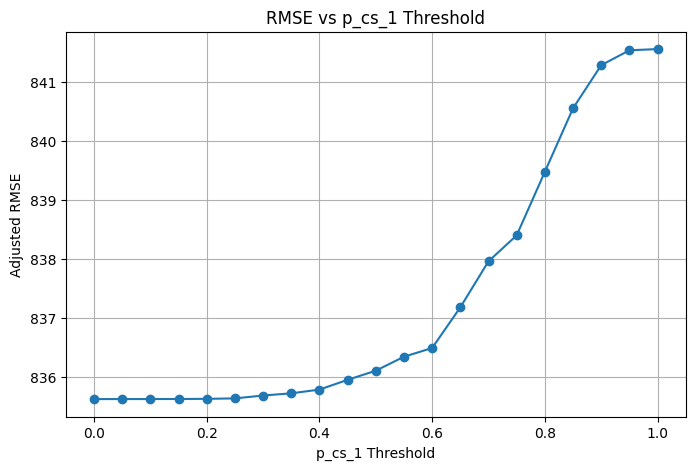

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assume df_preds contains:
# - "bagged_pred": predicted LC or HALC
# - "y_true": actual LC or HALC
# - "p_cs_1": predicted claim probability from classification model

thresholds = np.arange(0, 1.01, 0.05)
rmses = []

for t in thresholds:
    adjusted_preds = df_preds["bagged_pred"].copy()
    adjusted_preds[df_preds["p_cs_1"] < t] = 0  # Set prediction to 0 if claim probability < threshold
    rmse = np.sqrt(mean_squared_error(df_preds["y_true"], adjusted_preds))
    rmses.append(rmse)
    print(f"Threshold: {t:.2f} → RMSE: {rmse:.4f}")
plt.figure(figsize=(8, 5))
plt.plot(thresholds, rmses, marker='o')
plt.title("RMSE vs p_cs_1 Threshold")
plt.xlabel("p_cs_1 Threshold")
plt.ylabel("Adjusted RMSE")
plt.grid(True)
plt.show()

Threshold: 0.00 → RMSE: 1659.2720
Threshold: 0.05 → RMSE: 1659.2720
Threshold: 0.10 → RMSE: 1659.2720
Threshold: 0.15 → RMSE: 1659.2728
Threshold: 0.20 → RMSE: 1659.2743
Threshold: 0.25 → RMSE: 1659.2823
Threshold: 0.30 → RMSE: 1659.3158
Threshold: 0.35 → RMSE: 1659.3772
Threshold: 0.40 → RMSE: 1659.4997
Threshold: 0.45 → RMSE: 1659.6829
Threshold: 0.50 → RMSE: 1659.9576
Threshold: 0.55 → RMSE: 1660.4517
Threshold: 0.60 → RMSE: 1660.6028
Threshold: 0.65 → RMSE: 1661.8261
Threshold: 0.70 → RMSE: 1662.9638
Threshold: 0.75 → RMSE: 1663.8393
Threshold: 0.80 → RMSE: 1666.4592
Threshold: 0.85 → RMSE: 1668.5662
Threshold: 0.90 → RMSE: 1670.1073
Threshold: 0.95 → RMSE: 1670.5889
Threshold: 1.00 → RMSE: 1670.6271


<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'RMSE vs p_cs_1 Threshold')

Text(0.5, 0, 'p_cs_1 Threshold')

Text(0, 0.5, 'Adjusted RMSE')

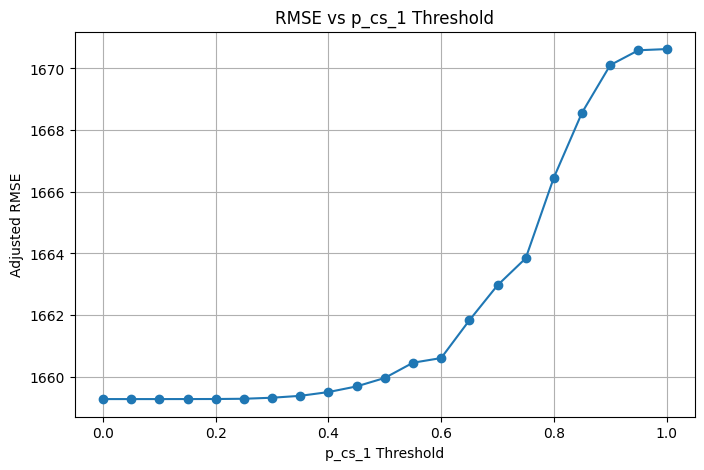

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assume df_preds contains:
# - "bagged_pred": predicted LC or HALC
# - "y_true": actual LC or HALC
# - "p_cs_1": predicted claim probability from classification model

thresholds = np.arange(0, 1.01, 0.05)
rmses = []

for t in thresholds:
    adjusted_preds = df_preds["bagged_pred"].copy()
    adjusted_preds[df_preds["p_cs_1"] < t] = 0  # Set prediction to 0 if claim probability < threshold
    rmse = np.sqrt(mean_squared_error(df_preds["y_true"], adjusted_preds))
    rmses.append(rmse)
    print(f"Threshold: {t:.2f} → RMSE: {rmse:.4f}")
plt.figure(figsize=(8, 5))
plt.plot(thresholds, rmses, marker='o')
plt.title("RMSE vs p_cs_1 Threshold")
plt.xlabel("p_cs_1 Threshold")
plt.ylabel("Adjusted RMSE")
plt.grid(True)
plt.show()

In [ ]:
import lightgbm as lgb
# Subset only selected features
X_full = X_lc[selected_feats]
y_full = y_lc


# Train final model on full data (no early stopping)
# Remove invalid arguments for full-data training
final_model = lgb.train(
    best_params,
    lgb.Dataset(X_full, y_full),
    num_boost_round=1000  # or set based on best iteration seen during CV
)

In [ ]:
import joblib

# Save the model
joblib.dump(final_model, "final_lgbm_lc_model_FULL_FINAL.pkl")

['final_lgbm_lc_model_FULL_FINAL.pkl']


📊 Feature Importances:
                  feature   importance
                   p_cs_1 6.902318e+06
         X_14_net_premium 1.659574e+06
        X_25_market_value 1.139483e+06
      X_28_vehicle_weight 1.132863e+06
         first_policy_age 1.117500e+06
       driving_experience 1.109305e+06
      age_at_last_renewal 8.934597e+05
   X_24_cylinder_capacity 8.105429e+05
              vehicle_age 7.917811e+05
       X_23_vehicle_power 7.634051e+05
   X_8_years_with_company 6.699805e+05
     contract_start_month 6.678974e+05
            policy_tenure 4.914499e+05
       X_9_total_policies 3.106803e+05
        X_10_max_policies 2.289012e+05
X_12_nonpay_cancellations 1.811739e+05
           X_26_num_doors 1.539536e+05
      X_13_payment_method 1.492176e+05
         X_7_channel_type 1.284741e+05
        X_21_multi_driver 9.771950e+04
         X_20_region_type 8.371169e+04
         X_27_fuel_type_P 6.132610e+04
      X_19_vehicle_type_2 3.429314e+04
        X_11_max_products 2.826737e+04
 

<Figure size 1000x750 with 0 Axes>

<BarContainer object of 25 artists>

Text(0.5, 1.0, 'Feature Importances (Gain)')

Text(0.5, 0, 'Importance')

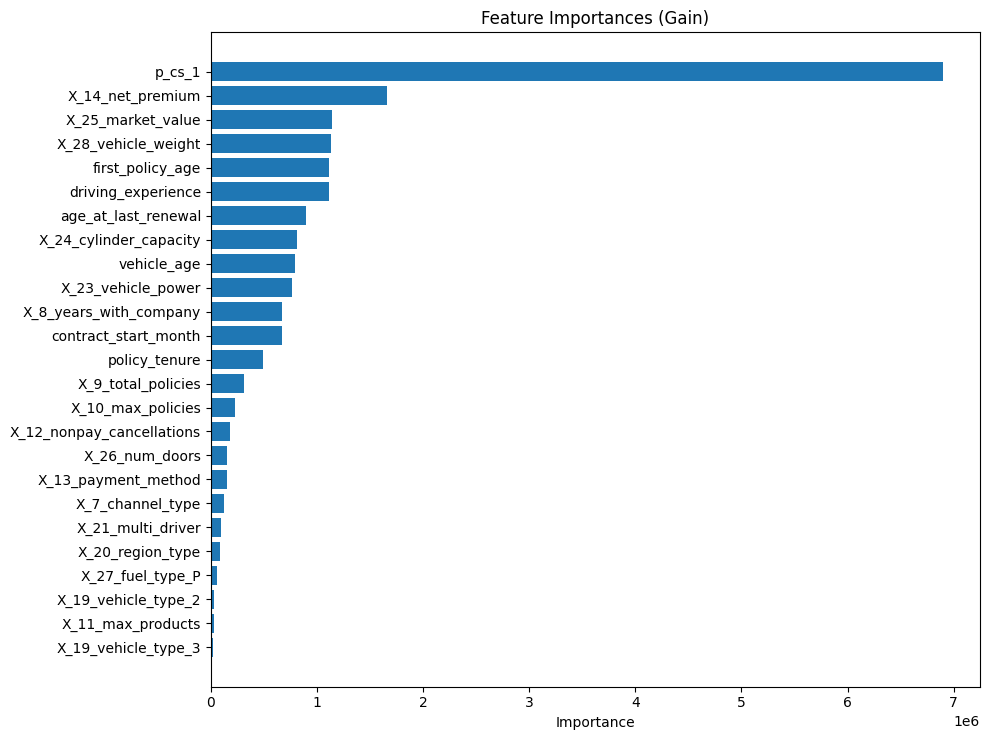

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importance_df = pd.DataFrame({
    "feature": final_model.feature_name(),
    "importance": final_model.feature_importance(importance_type="gain")
}).sort_values("importance", ascending=False)

# ✅ Print all feature importances
print("\n📊 Feature Importances:")
print(importance_df.to_string(index=False))  # prettier output

# ✅ Plot all features
plt.figure(figsize=(10, len(importance_df) * 0.3))
plt.barh(importance_df["feature"][::-1], importance_df["importance"][::-1])
plt.title("Feature Importances (Gain)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


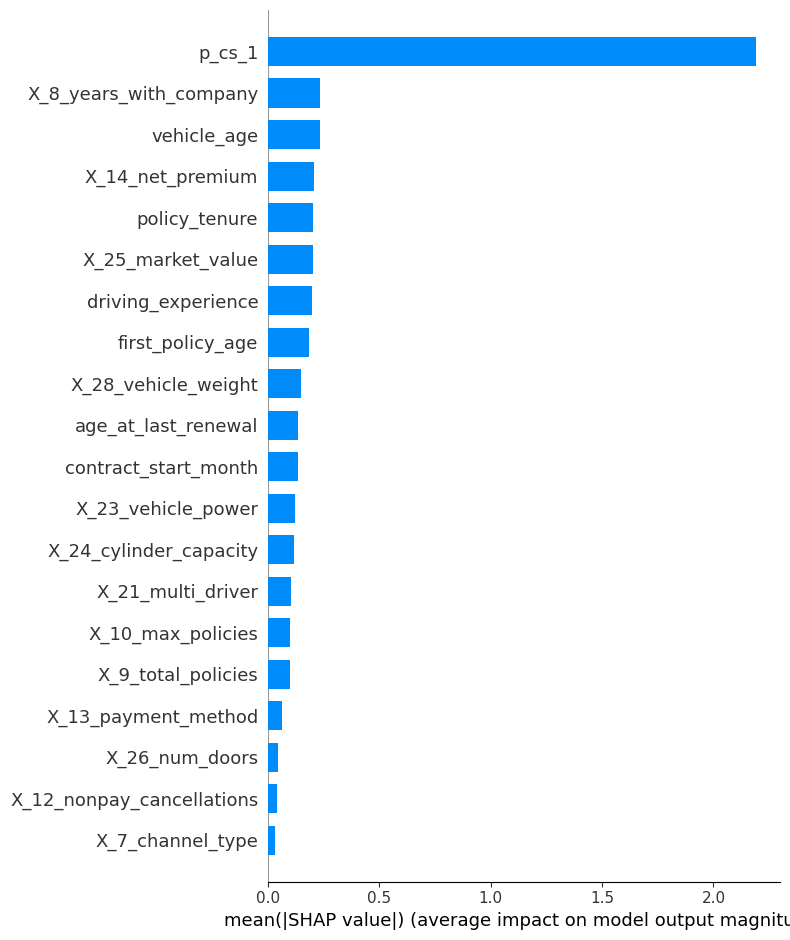

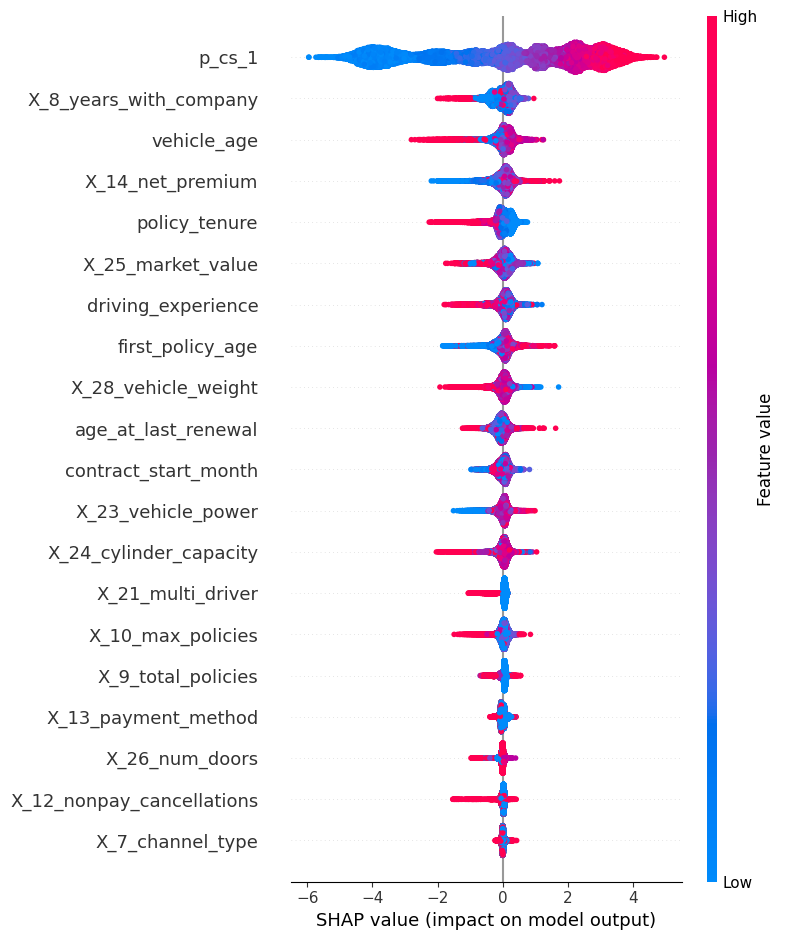

In [ ]:
import shap

# SHAP Explainer
explainer = shap.Explainer(final_model)
shap_values = explainer(X_full)

# Bar Plot (mean absolute SHAP values)
shap.summary_plot(shap_values, X_full, plot_type="bar")

# Dot plot (distribution per feature)
shap.summary_plot(shap_values, X_full)

In [ ]:
X_halc = df.drop(columns=[
    "CS", "X_15_total_claim_cost", "X_16_num_claims_year", "X_17_num_claims_total",
    "X_18_claim_rate", "X_22_vehicle_reg_year", "LC", "HALC", "LC_bin", "HALC_bin", "strata"
])
y_halc = df["HALC"]
strata_col = df["strata"]
X_halc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37451 entries, 34429 to 24104
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X_7_channel_type           37451 non-null  int64  
 1   X_8_years_with_company     37451 non-null  int64  
 2   X_9_total_policies         37451 non-null  int64  
 3   X_10_max_policies          37451 non-null  int64  
 4   X_11_max_products          37451 non-null  int64  
 5   X_12_nonpay_cancellations  37451 non-null  int64  
 6   X_13_payment_method        37451 non-null  int64  
 7   X_14_net_premium           37451 non-null  float64
 8   X_20_region_type           37451 non-null  int64  
 9   X_21_multi_driver          37451 non-null  int64  
 10  X_23_vehicle_power         37451 non-null  int64  
 11  X_24_cylinder_capacity     37451 non-null  int64  
 12  X_25_market_value          37451 non-null  float64
 13  X_26_num_doors             37451 non-null  int6

In [ ]:
models, df_preds, fold_rmses, avg_rmse, feat_imps, selected_feats, best_params = run_lgbm_tweedie_cv_with_optuna_and_bagged_output(
    X_halc, y_halc, strata_col, n_trials=50, n_splits=3
)

[I 2025-05-07 02:42:35,671] A new study created in memory with name: no-name-7a6d841b-c007-4af6-ba5b-8f2cbaf1d585


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[39]	valid_0's rmse: 1201.8
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 1305.63
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:39,183] Trial 0 finished with value: 1591.8374830793437 and parameters: {'tweedie_power': 1.4968597351262294, 'learning_rate': 0.0526911094569775, 'num_leaves': 240, 'bagging_fraction': 0.9420021048398391, 'feature_fraction': 0.9780126270918263}. Best is trial 0 with value: 1591.8374830793437.


Early stopping, best iteration is:
[22]	valid_0's rmse: 2268.08
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 1199.74
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[23]	valid_0's rmse: 1301.94
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:40,494] Trial 1 finished with value: 1589.4927536139287 and parameters: {'tweedie_power': 1.2066237114432248, 'learning_rate': 0.059489653472372825, 'num_leaves': 101, 'bagging_fraction': 0.8505127982537634, 'feature_fraction': 0.79824780194366}. Best is trial 1 with value: 1589.4927536139287.


Early stopping, best iteration is:
[52]	valid_0's rmse: 2266.8
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's rmse: 1199.31
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1303.89
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:42,660] Trial 2 finished with value: 1590.1964119105457 and parameters: {'tweedie_power': 1.1667913123746587, 'learning_rate': 0.04080698807680219, 'num_leaves': 225, 'bagging_fraction': 0.9289860700326295, 'feature_fraction': 0.744182107936731}. Best is trial 1 with value: 1589.4927536139287.


Early stopping, best iteration is:
[26]	valid_0's rmse: 2267.39
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[82]	valid_0's rmse: 1199.11
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[102]	valid_0's rmse: 1303.03
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:44,844] Trial 3 finished with value: 1589.5902307861052 and parameters: {'tweedie_power': 1.2134706677994056, 'learning_rate': 0.02908234362674795, 'num_leaves': 103, 'bagging_fraction': 0.839706691082529, 'feature_fraction': 0.6524229408244814}. Best is trial 1 with value: 1589.4927536139287.


Early stopping, best iteration is:
[104]	valid_0's rmse: 2266.63
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	valid_0's rmse: 1201.17
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[77]	valid_0's rmse: 1305.78
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:47,596] Trial 4 finished with value: 1591.5791170502864 and parameters: {'tweedie_power': 1.6238321106884643, 'learning_rate': 0.02845229766947955, 'num_leaves': 160, 'bagging_fraction': 0.9440530236262492, 'feature_fraction': 0.6828912417444095}. Best is trial 1 with value: 1589.4927536139287.


Early stopping, best iteration is:
[73]	valid_0's rmse: 2267.79
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1201.58
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1306.42
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:51,778] Trial 5 finished with value: 1591.9462395826522 and parameters: {'tweedie_power': 1.7801030227932557, 'learning_rate': 0.04236004863626151, 'num_leaves': 162, 'bagging_fraction': 0.7645885787540505, 'feature_fraction': 0.8461849443445293}. Best is trial 1 with value: 1589.4927536139287.


Early stopping, best iteration is:
[26]	valid_0's rmse: 2267.84
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid_0's rmse: 1202.72
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[23]	valid_0's rmse: 1306.39
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:53,601] Trial 6 finished with value: 1592.4347647083625 and parameters: {'tweedie_power': 1.4225946100505482, 'learning_rate': 0.08782812021315968, 'num_leaves': 235, 'bagging_fraction': 0.6499425768057566, 'feature_fraction': 0.6187031031637616}. Best is trial 1 with value: 1589.4927536139287.


Early stopping, best iteration is:
[12]	valid_0's rmse: 2268.19
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[23]	valid_0's rmse: 1200.47
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1304.27
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:55,901] Trial 7 finished with value: 1590.7071887714512 and parameters: {'tweedie_power': 1.2133793290092525, 'learning_rate': 0.04137149185133329, 'num_leaves': 230, 'bagging_fraction': 0.9709530589126482, 'feature_fraction': 0.6432585180541472}. Best is trial 1 with value: 1589.4927536139287.


Early stopping, best iteration is:
[54]	valid_0's rmse: 2267.38
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[45]	valid_0's rmse: 1198.71
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's rmse: 1302.98
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:56,918] Trial 8 finished with value: 1589.0907782649174 and parameters: {'tweedie_power': 1.4824545483418117, 'learning_rate': 0.07424680656959509, 'num_leaves': 48, 'bagging_fraction': 0.6253589655499031, 'feature_fraction': 0.8743471147028731}. Best is trial 8 with value: 1589.0907782649174.


Early stopping, best iteration is:
[47]	valid_0's rmse: 2265.58
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[23]	valid_0's rmse: 1200.64
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	valid_0's rmse: 1303.97
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:42:58,639] Trial 9 finished with value: 1590.608400909734 and parameters: {'tweedie_power': 1.5480700174408555, 'learning_rate': 0.06401882711036595, 'num_leaves': 131, 'bagging_fraction': 0.8479826224123512, 'feature_fraction': 0.996143230191371}. Best is trial 8 with value: 1589.0907782649174.


Early stopping, best iteration is:
[32]	valid_0's rmse: 2267.21
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[44]	valid_0's rmse: 1198.03
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[99]	valid_0's rmse: 1302.13
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:02,360] Trial 10 finished with value: 1588.6384101934375 and parameters: {'tweedie_power': 1.8836257151549431, 'learning_rate': 0.09859259284467431, 'num_leaves': 40, 'bagging_fraction': 0.6062480072647253, 'feature_fraction': 0.888630341022937}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[53]	valid_0's rmse: 2265.7
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's rmse: 1198.32
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[58]	valid_0's rmse: 1303.38
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:04,806] Trial 11 finished with value: 1589.2129850116496 and parameters: {'tweedie_power': 1.850297302495995, 'learning_rate': 0.09571371445265964, 'num_leaves': 34, 'bagging_fraction': 0.6211593127095641, 'feature_fraction': 0.8857541726492069}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[27]	valid_0's rmse: 2265.95
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's rmse: 1198.66
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	valid_0's rmse: 1302.28
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:05,672] Trial 12 finished with value: 1588.8261143008274 and parameters: {'tweedie_power': 1.707236326152953, 'learning_rate': 0.07452219757136049, 'num_leaves': 31, 'bagging_fraction': 0.6879043363997879, 'feature_fraction': 0.9237361377134413}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[75]	valid_0's rmse: 2265.54
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 1198.66
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's rmse: 1303.53
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:06,851] Trial 13 finished with value: 1589.5221194711821 and parameters: {'tweedie_power': 1.7301868720785316, 'learning_rate': 0.08176752916731889, 'num_leaves': 70, 'bagging_fraction': 0.706109055378615, 'feature_fraction': 0.9272507673034577}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[51]	valid_0's rmse: 2266.38
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[22]	valid_0's rmse: 1199.56
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[110]	valid_0's rmse: 1302.1
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:08,179] Trial 14 finished with value: 1588.9891736336049 and parameters: {'tweedie_power': 1.886199713450954, 'learning_rate': 0.09899788216095982, 'num_leaves': 67, 'bagging_fraction': 0.6976533565295391, 'feature_fraction': 0.9268151347288814}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[31]	valid_0's rmse: 2265.31
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[27]	valid_0's rmse: 1200.13
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[42]	valid_0's rmse: 1304.64
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:09,692] Trial 15 finished with value: 1590.3946394595148 and parameters: {'tweedie_power': 1.6702127063904078, 'learning_rate': 0.07299618793932884, 'num_leaves': 84, 'bagging_fraction': 0.6910554616095786, 'feature_fraction': 0.7821490604985318}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[55]	valid_0's rmse: 2266.41
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's rmse: 1198.35
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[50]	valid_0's rmse: 1302.21
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:12,308] Trial 16 finished with value: 1588.8991886857248 and parameters: {'tweedie_power': 1.774134015229262, 'learning_rate': 0.08679650407912014, 'num_leaves': 33, 'bagging_fraction': 0.7597945938170968, 'feature_fraction': 0.9406276556765557}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[38]	valid_0's rmse: 2266.13
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[12]	valid_0's rmse: 1203.15
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[19]	valid_0's rmse: 1308.09
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:13,884] Trial 17 finished with value: 1593.3887550876336 and parameters: {'tweedie_power': 1.8969757340341604, 'learning_rate': 0.014668460066844045, 'num_leaves': 193, 'bagging_fraction': 0.6002151511338223, 'feature_fraction': 0.8653743211295547}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[6]	valid_0's rmse: 2268.92
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[21]	valid_0's rmse: 1200.59
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's rmse: 1303.29
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:15,427] Trial 18 finished with value: 1590.4080177179976 and parameters: {'tweedie_power': 1.365771328868414, 'learning_rate': 0.06983678058248917, 'num_leaves': 121, 'bagging_fraction': 0.666261730059828, 'feature_fraction': 0.8365259300388387}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[22]	valid_0's rmse: 2267.35
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 1199.43
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	valid_0's rmse: 1303.66
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:18,668] Trial 19 finished with value: 1589.6687860572436 and parameters: {'tweedie_power': 1.6229883328634949, 'learning_rate': 0.08268829237369194, 'num_leaves': 61, 'bagging_fraction': 0.7297299393392502, 'feature_fraction': 0.7328596141052034}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[40]	valid_0's rmse: 2265.92
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[22]	valid_0's rmse: 1200.12
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1304.79
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:19,816] Trial 20 finished with value: 1590.4703181153225 and parameters: {'tweedie_power': 1.8137179374069645, 'learning_rate': 0.09419143012450022, 'num_leaves': 86, 'bagging_fraction': 0.6544217291287876, 'feature_fraction': 0.9570817903914248}. Best is trial 10 with value: 1588.6384101934375.


Early stopping, best iteration is:
[19]	valid_0's rmse: 2266.51
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's rmse: 1198.42
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[87]	valid_0's rmse: 1301.64
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:20,775] Trial 21 finished with value: 1588.5511170417406 and parameters: {'tweedie_power': 1.7556741334433008, 'learning_rate': 0.08558719386825513, 'num_leaves': 35, 'bagging_fraction': 0.7635574513087304, 'feature_fraction': 0.9150797729491241}. Best is trial 21 with value: 1588.5511170417406.


Early stopping, best iteration is:
[40]	valid_0's rmse: 2265.59
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[46]	valid_0's rmse: 1198.26
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	valid_0's rmse: 1302.97
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:21,792] Trial 22 finished with value: 1588.9749852240514 and parameters: {'tweedie_power': 1.701824258984671, 'learning_rate': 0.07798619959225411, 'num_leaves': 45, 'bagging_fraction': 0.7997610362354404, 'feature_fraction': 0.8951836158314499}. Best is trial 21 with value: 1588.5511170417406.


Early stopping, best iteration is:
[51]	valid_0's rmse: 2265.69
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[24]	valid_0's rmse: 1199
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	valid_0's rmse: 1303
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:22,971] Trial 23 finished with value: 1589.256116718123 and parameters: {'tweedie_power': 1.7545149071882402, 'learning_rate': 0.08911524042610305, 'num_leaves': 56, 'bagging_fraction': 0.7513964803211092, 'feature_fraction': 0.9078498339760929}. Best is trial 21 with value: 1588.5511170417406.


Early stopping, best iteration is:
[75]	valid_0's rmse: 2265.77
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1198.11
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	valid_0's rmse: 1300.45
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:23,820] Trial 24 finished with value: 1587.9510712023693 and parameters: {'tweedie_power': 1.589584780947843, 'learning_rate': 0.09914350617998578, 'num_leaves': 31, 'bagging_fraction': 0.7942693655208026, 'feature_fraction': 0.8355357731826211}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[47]	valid_0's rmse: 2265.29
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 1199.2
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 1302.86
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:24,913] Trial 25 finished with value: 1589.5362379353764 and parameters: {'tweedie_power': 1.5756951556948537, 'learning_rate': 0.0991152086806575, 'num_leaves': 87, 'bagging_fraction': 0.8137370696715444, 'feature_fraction': 0.8311690046037681}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[18]	valid_0's rmse: 2266.55
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 1198.59
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1302.9
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:26,003] Trial 26 finished with value: 1589.1315907325388 and parameters: {'tweedie_power': 1.6398497202230295, 'learning_rate': 0.09162066460562616, 'num_leaves': 72, 'bagging_fraction': 0.8963621071281261, 'feature_fraction': 0.7707940991461532}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[26]	valid_0's rmse: 2265.9
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[28]	valid_0's rmse: 1198.72
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's rmse: 1303.43
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:26,989] Trial 27 finished with value: 1589.4634956571083 and parameters: {'tweedie_power': 1.8407997018850701, 'learning_rate': 0.0832306793885679, 'num_leaves': 48, 'bagging_fraction': 0.877553521793772, 'feature_fraction': 0.814794193289264}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[48]	valid_0's rmse: 2266.24
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[14]	valid_0's rmse: 1201.26
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 1305.13
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:28,715] Trial 28 finished with value: 1591.108692084748 and parameters: {'tweedie_power': 1.3880260025104458, 'learning_rate': 0.09270194686871683, 'num_leaves': 206, 'bagging_fraction': 0.7890082621370006, 'feature_fraction': 0.8586191856813317}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[14]	valid_0's rmse: 2266.94
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[30]	valid_0's rmse: 1199.96
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	valid_0's rmse: 1302.36
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:32,733] Trial 29 finished with value: 1589.456140808553 and parameters: {'tweedie_power': 1.5062639724306834, 'learning_rate': 0.0635964013684961, 'num_leaves': 102, 'bagging_fraction': 0.9988438430573741, 'feature_fraction': 0.9697423190427847}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[49]	valid_0's rmse: 2266.05
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[5]	valid_0's rmse: 1203.05
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[5]	valid_0's rmse: 1308.1
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:34,378] Trial 30 finished with value: 1593.3432849988067 and parameters: {'tweedie_power': 1.819597070254612, 'learning_rate': 0.09781472044861236, 'num_leaves': 251, 'bagging_fraction': 0.7265108443297639, 'feature_fraction': 0.89828125753342}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[4]	valid_0's rmse: 2268.88
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[75]	valid_0's rmse: 1197.54
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's rmse: 1302.29
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:35,422] Trial 31 finished with value: 1588.3441060888945 and parameters: {'tweedie_power': 1.69991959342538, 'learning_rate': 0.07812673461037123, 'num_leaves': 31, 'bagging_fraction': 0.6680504175962418, 'feature_fraction': 0.9167620499050488}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[79]	valid_0's rmse: 2265.2
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[44]	valid_0's rmse: 1198.72
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[108]	valid_0's rmse: 1303.08
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:36,709] Trial 32 finished with value: 1589.0260661423326 and parameters: {'tweedie_power': 1.6788985623449328, 'learning_rate': 0.051490398010173695, 'num_leaves': 45, 'bagging_fraction': 0.6087105352343342, 'feature_fraction': 0.9494346852173315}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[63]	valid_0's rmse: 2265.28
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[27]	valid_0's rmse: 1198.61
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	valid_0's rmse: 1302.25
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:37,535] Trial 33 finished with value: 1588.7721137773326 and parameters: {'tweedie_power': 1.5871300654057492, 'learning_rate': 0.0866163273814003, 'num_leaves': 31, 'bagging_fraction': 0.6419050561396777, 'feature_fraction': 0.8095078581695656}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[57]	valid_0's rmse: 2265.45
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[34]	valid_0's rmse: 1198.56
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	valid_0's rmse: 1303.25
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:38,644] Trial 34 finished with value: 1589.3181940042741 and parameters: {'tweedie_power': 1.7820851717038932, 'learning_rate': 0.07915421388605545, 'num_leaves': 55, 'bagging_fraction': 0.8257660823746631, 'feature_fraction': 0.9911000477821764}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[47]	valid_0's rmse: 2266.14
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[20]	valid_0's rmse: 1199.64
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[17]	valid_0's rmse: 1303.88
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:39,803] Trial 35 finished with value: 1590.0745459934762 and parameters: {'tweedie_power': 1.7182344308296424, 'learning_rate': 0.09997998745567553, 'num_leaves': 79, 'bagging_fraction': 0.7818770635849143, 'feature_fraction': 0.9064455429923676}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[21]	valid_0's rmse: 2266.7
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[52]	valid_0's rmse: 1198.08
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's rmse: 1302.51
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:40,896] Trial 36 finished with value: 1588.740116165185 and parameters: {'tweedie_power': 1.6404235487499008, 'learning_rate': 0.056807965649718524, 'num_leaves': 42, 'bagging_fraction': 0.7326489313571014, 'feature_fraction': 0.8756157299847702}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[50]	valid_0's rmse: 2265.63
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid_0's rmse: 1199.78
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[9]	valid_0's rmse: 1304.53
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:42,009] Trial 37 finished with value: 1590.635334151257 and parameters: {'tweedie_power': 1.1009976044678387, 'learning_rate': 0.09180165231971299, 'num_leaves': 113, 'bagging_fraction': 0.6710456960390578, 'feature_fraction': 0.8491762476380288}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[10]	valid_0's rmse: 2267.6
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1202.26
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[22]	valid_0's rmse: 1307.08
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:46,333] Trial 38 finished with value: 1591.9828242824924 and parameters: {'tweedie_power': 1.7954699238276999, 'learning_rate': 0.06809465479899732, 'num_leaves': 154, 'bagging_fraction': 0.6342445051153351, 'feature_fraction': 0.7338824899384256}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[65]	valid_0's rmse: 2266.61
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's rmse: 1199.53
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[53]	valid_0's rmse: 1303.97
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:47,650] Trial 39 finished with value: 1589.8705952660303 and parameters: {'tweedie_power': 1.8629512335210374, 'learning_rate': 0.047943666765230625, 'num_leaves': 61, 'bagging_fraction': 0.8630926969552553, 'feature_fraction': 0.7610003848706103}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[72]	valid_0's rmse: 2266.11
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[18]	valid_0's rmse: 1201.56
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[22]	valid_0's rmse: 1304.87
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:49,677] Trial 40 finished with value: 1591.3037841870482 and parameters: {'tweedie_power': 1.5178015800957751, 'learning_rate': 0.08577290457423925, 'num_leaves': 182, 'bagging_fraction': 0.9028670665999627, 'feature_fraction': 0.7070009714878119}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[23]	valid_0's rmse: 2267.48
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[68]	valid_0's rmse: 1197.99
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	valid_0's rmse: 1302.9
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:50,774] Trial 41 finished with value: 1588.9956455445347 and parameters: {'tweedie_power': 1.648041720228078, 'learning_rate': 0.05743937324718385, 'num_leaves': 42, 'bagging_fraction': 0.7251724187585221, 'feature_fraction': 0.878550329726169}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[50]	valid_0's rmse: 2266.11
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 1198.64
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	valid_0's rmse: 1301.48
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:51,801] Trial 42 finished with value: 1588.598976809201 and parameters: {'tweedie_power': 1.5996969351571202, 'learning_rate': 0.09386582682079198, 'num_leaves': 51, 'bagging_fraction': 0.7395895593663209, 'feature_fraction': 0.8244445937390423}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[47]	valid_0's rmse: 2265.68
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[23]	valid_0's rmse: 1198.36
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 1302.82
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:52,776] Trial 43 finished with value: 1589.1222646351898 and parameters: {'tweedie_power': 1.593014083231944, 'learning_rate': 0.090732822426006, 'num_leaves': 57, 'bagging_fraction': 0.7755199266707864, 'feature_fraction': 0.7973149923332603}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[25]	valid_0's rmse: 2266.19
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[24]	valid_0's rmse: 1198.75
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1302.48
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:53,593] Trial 44 finished with value: 1589.0245377674935 and parameters: {'tweedie_power': 1.748967710966906, 'learning_rate': 0.0945804345298896, 'num_leaves': 39, 'bagging_fraction': 0.7487197256933642, 'feature_fraction': 0.826372640991364}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[36]	valid_0's rmse: 2265.84
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's rmse: 1197.72
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[35]	valid_0's rmse: 1301.71
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:54,613] Trial 45 finished with value: 1588.4079110266177 and parameters: {'tweedie_power': 1.4542913853676238, 'learning_rate': 0.07767261288275551, 'num_leaves': 51, 'bagging_fraction': 0.817221557805232, 'feature_fraction': 0.8529674077394853}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[42]	valid_0's rmse: 2265.79
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's rmse: 1198.63
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[41]	valid_0's rmse: 1302.53
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:55,810] Trial 46 finished with value: 1589.0688321324187 and parameters: {'tweedie_power': 1.465884566164963, 'learning_rate': 0.07579898846365454, 'num_leaves': 75, 'bagging_fraction': 0.8129199401016931, 'feature_fraction': 0.7912082229915435}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[44]	valid_0's rmse: 2266.05
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[21]	valid_0's rmse: 1198.52
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[32]	valid_0's rmse: 1300.48
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:43:57,842] Trial 47 finished with value: 1588.2709560344438 and parameters: {'tweedie_power': 1.4328533924833338, 'learning_rate': 0.07980710723369684, 'num_leaves': 66, 'bagging_fraction': 0.8309095760725738, 'feature_fraction': 0.8494042577272012}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[28]	valid_0's rmse: 2265.81
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[32]	valid_0's rmse: 1197.95
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid_0's rmse: 1300.83
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:44:00,439] Trial 48 finished with value: 1588.2212927481214 and parameters: {'tweedie_power': 1.3536313103707742, 'learning_rate': 0.06375062483013262, 'num_leaves': 63, 'bagging_fraction': 0.8377566141682572, 'feature_fraction': 0.8536369297563001}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[46]	valid_0's rmse: 2265.89
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[33]	valid_0's rmse: 1198.92
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 1302.86
Training until validation scores don't improve for 50 rounds


[I 2025-05-07 02:44:01,755] Trial 49 finished with value: 1589.2675895552663 and parameters: {'tweedie_power': 1.2994058414759415, 'learning_rate': 0.06467778047374922, 'num_leaves': 91, 'bagging_fraction': 0.8362853939908121, 'feature_fraction': 0.8515531776920187}. Best is trial 24 with value: 1587.9510712023693.


Early stopping, best iteration is:
[41]	valid_0's rmse: 2266.02

✅ Best Hyperparameters Found: {'tweedie_power': 1.589584780947843, 'learning_rate': 0.09914350617998578, 'num_leaves': 31, 'bagging_fraction': 0.7942693655208026, 'feature_fraction': 0.8355357731826211, 'objective': 'tweedie', 'metric': 'rmse', 'boosting_type': 'gbdt', 'verbosity': -1, 'seed': 42}

🔎 Computing cross-validated feature importances using stratified 3-fold split...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[37]	valid_0's rmse: 1197.65
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[30]	valid_0's rmse: 1301.1
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	valid_0's rmse: 2264.97

📌 Selected 25 features with average importance ≥ 1.0

🔁 Fold 1
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[21]	valid_0's rmse:

In [ ]:
df_preds[['p_cs_1','y_true','bagged_pred']].head(50)

,p_cs_1,y_true,bagged_pred
X_1_policy_id,,,
34429,0.619372,0.0000,353.006876
5552,0.302561,0.0000,19.239676
47700,0.276495,0.0000,5.175472
25425,0.080199,0.0000,0.212111
4727,0.752752,0.0000,449.832791
1752,0.119979,0.0000,0.448966
39480,0.215255,0.0000,11.875358
45018,0.050275,0.0000,0.203867
2943,0.482597,0.0000,61.706236


In [ ]:
selected_feats

['p_cs_1',
 'X_14_net_premium',
 'driving_experience',
 'policy_tenure',
 'first_policy_age',
 'X_28_vehicle_weight',
 'X_25_market_value',
 'X_23_vehicle_power',
 'vehicle_age',
 'contract_start_month',
 'age_at_last_renewal',
 'X_8_years_with_company',
 'X_24_cylinder_capacity',
 'X_9_total_policies',
 'X_10_max_policies',
 'X_12_nonpay_cancellations',
 'X_26_num_doors',
 'X_13_payment_method',
 'X_7_channel_type',
 'X_21_multi_driver',
 'X_27_fuel_type_P',
 'X_20_region_type',
 'X_11_max_products',
 'X_19_vehicle_type_2',
 'X_19_vehicle_type_3']

In [ ]:
fold_rmses

[np.float64(1198.4660251461542),
 np.float64(1300.6686151504719),
 np.float64(2265.3214575283914)]

In [ ]:
avg_rmse

np.float64(1659.271973096361)

In [ ]:
feat_imps

,importance
feature,
p_cs_1,2.468803e+06
X_14_net_premium,2.906118e+05
driving_experience,1.951133e+05
policy_tenure,1.870748e+05
X_25_market_value,1.635646e+05
first_policy_age,1.541639e+05
X_28_vehicle_weight,1.477251e+05
X_23_vehicle_power,1.267887e+05
age_at_last_renewal,1.240466e+05


In [ ]:
selected_feats

['p_cs_1',
 'X_14_net_premium',
 'driving_experience',
 'policy_tenure',
 'first_policy_age',
 'X_28_vehicle_weight',
 'X_25_market_value',
 'X_23_vehicle_power',
 'vehicle_age',
 'contract_start_month',
 'age_at_last_renewal',
 'X_8_years_with_company',
 'X_24_cylinder_capacity',
 'X_9_total_policies',
 'X_10_max_policies',
 'X_12_nonpay_cancellations',
 'X_26_num_doors',
 'X_13_payment_method',
 'X_7_channel_type',
 'X_21_multi_driver',
 'X_27_fuel_type_P',
 'X_20_region_type',
 'X_11_max_products',
 'X_19_vehicle_type_2',
 'X_19_vehicle_type_3']

In [ ]:
best_params

{'tweedie_power': 1.589584780947843,
 'learning_rate': 0.09914350617998578,
 'num_leaves': 31,
 'bagging_fraction': 0.7942693655208026,
 'feature_fraction': 0.8355357731826211,
 'objective': 'tweedie',
 'metric': 'rmse',
 'boosting_type': 'gbdt',
 'verbosity': -1,
 'seed': 42}

In [ ]:
import json

with open("best_params_halc_fold_Final.json", "w") as f:
    json.dump(best_params, f, indent=4)


In [ ]:
# Subset only selected features
X_full = X_halc[selected_feats]
y_full = y_halc

# Train final model on full data (no early stopping)
# Remove invalid arguments for full-data training
final_halc_model = lgb.train(
    best_params,
    lgb.Dataset(X_full, y_full),
    num_boost_round=1000  # or set based on best iteration seen during CV
)

In [ ]:
import joblib

# Save the model
joblib.dump(final_halc_model, "final_lgbm_halc_model_FULL_FINAL.pkl")

['final_lgbm_halc_model_FULL_FINAL.pkl']


📊 Feature Importances:
                  feature   importance
                   p_cs_1 6.902318e+06
         X_14_net_premium 1.659574e+06
        X_25_market_value 1.139483e+06
      X_28_vehicle_weight 1.132863e+06
         first_policy_age 1.117500e+06
       driving_experience 1.109305e+06
      age_at_last_renewal 8.934597e+05
   X_24_cylinder_capacity 8.105429e+05
              vehicle_age 7.917811e+05
       X_23_vehicle_power 7.634051e+05
   X_8_years_with_company 6.699805e+05
     contract_start_month 6.678974e+05
            policy_tenure 4.914499e+05
       X_9_total_policies 3.106803e+05
        X_10_max_policies 2.289012e+05
X_12_nonpay_cancellations 1.811739e+05
           X_26_num_doors 1.539536e+05
      X_13_payment_method 1.492176e+05
         X_7_channel_type 1.284741e+05
        X_21_multi_driver 9.771950e+04
         X_20_region_type 8.371169e+04
         X_27_fuel_type_P 6.132610e+04
      X_19_vehicle_type_2 3.429314e+04
        X_11_max_products 2.826737e+04
 

<Figure size 1000x750 with 0 Axes>

<BarContainer object of 25 artists>

Text(0.5, 1.0, 'Feature Importances (Gain)')

Text(0.5, 0, 'Importance')

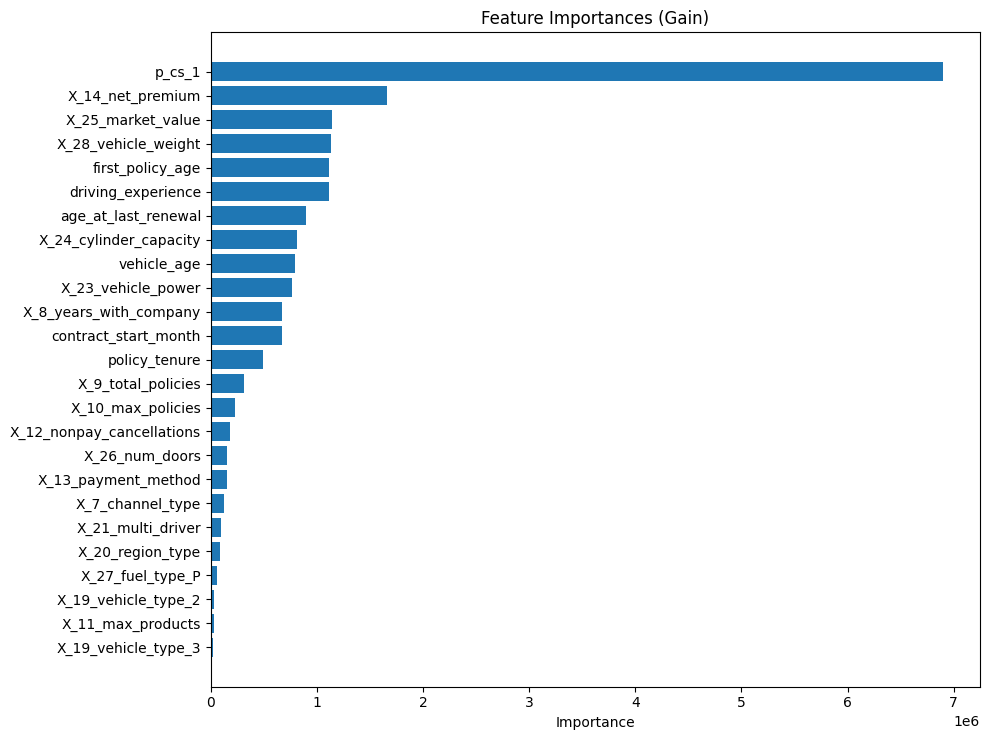

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importance_df = pd.DataFrame({
    "feature": final_model.feature_name(),
    "importance": final_model.feature_importance(importance_type="gain")
}).sort_values("importance", ascending=False)

# ✅ Print all feature importances
print("\n📊 Feature Importances:")
print(importance_df.to_string(index=False))  # prettier output

# ✅ Plot all features
plt.figure(figsize=(10, len(importance_df) * 0.3))
plt.barh(importance_df["feature"][::-1], importance_df["importance"][::-1])
plt.title("Feature Importances (Gain)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

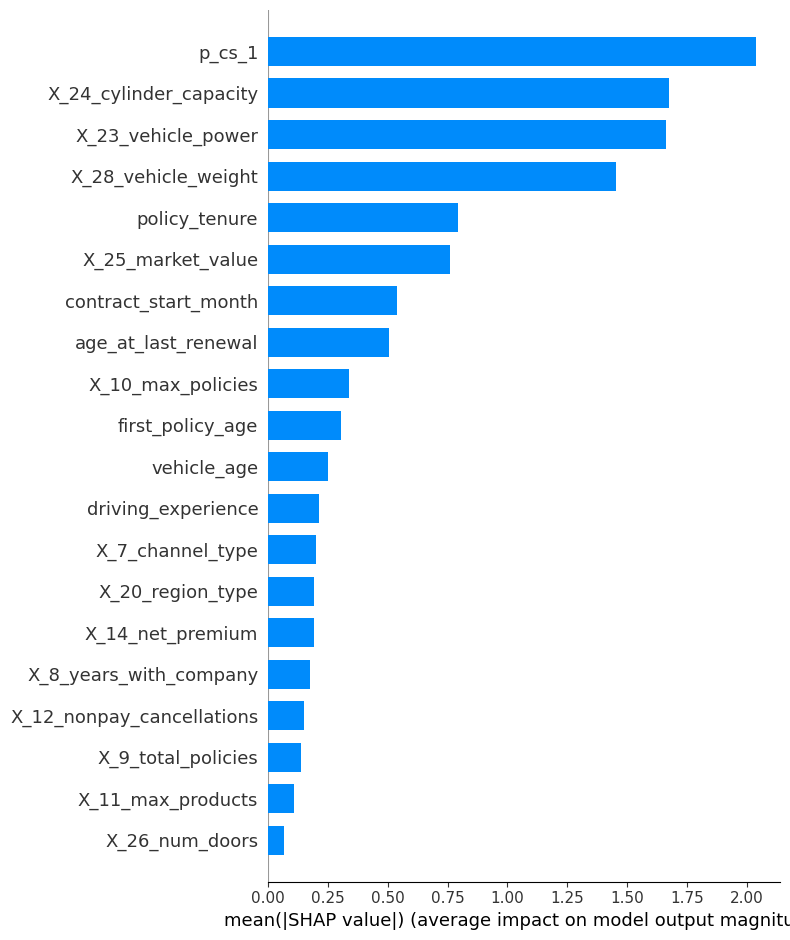

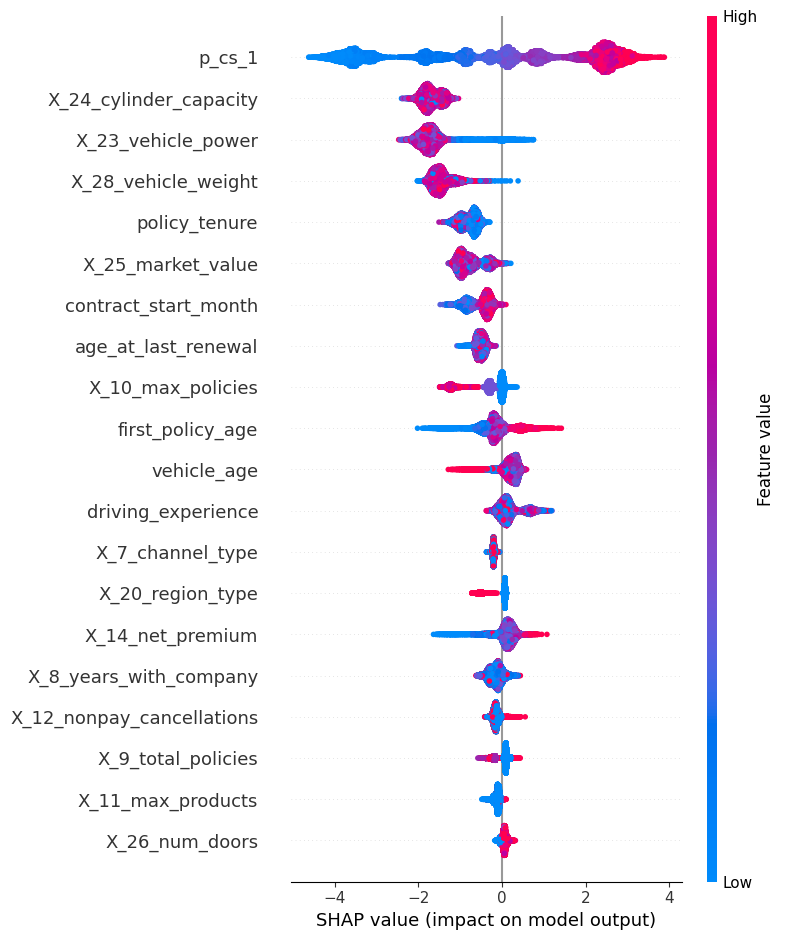

In [ ]:
import shap

# SHAP Explainer
explainer = shap.Explainer(final_model)
shap_values = explainer(X_full)

# Bar Plot (mean absolute SHAP values)
shap.summary_plot(shap_values, X_full, plot_type="bar")

# Dot plot (distribution per feature)
shap.summary_plot(shap_values, X_full)

In [ ]:
file_path ='/content/drive/MyDrive/Group_Project/Data/insurance_test.csv'
df_test = pd.read_csv(file_path)
# Display the first few rows of the dataframe
df_test.head()

,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.19,X.20,X.21,X.22,X.23,X.24,X.25,X.26,X.27,X.28
0,23/06/2017,23/06/2018,23/06/2019,13/09/1982,03/02/2011,0,2,2,2,1,1,0,240.76,3,1,0,2003,115,1910,16400.00,5,D,1305
1,29/06/2015,29/06/2016,29/06/2017,07/07/1946,12/08/1966,0,2,1,1,1,1,1,367.97,3,0,0,1999,90,1597,13480.70,5,P,1083
2,14/03/2018,14/03/2018,14/03/2019,26/12/1957,02/09/1977,0,1,4,4,2,0,0,291.90,3,0,0,2003,143,2148,36500.00,5,D,1495
3,16/10/2014,16/10/2018,16/10/2019,27/02/1961,29/10/1980,1,5,1,1,1,0,0,303.28,2,1,0,1998,60,1686,12356.81,5,D,1010
4,01/07/2015,01/07/2017,01/07/2018,03/07/1986,02/08/2006,0,3,1,1,1,1,0,333.30,3,0,0,2015,66,998,11800.00,5,P,933


In [ ]:
import pandas as pd
import numpy as np

# --- STEP 1: Rename Columns ---
column_rename_map_with_index = {
    "X.1": "X_1_policy_id",
    "X.2": "X_2_policy_start_date",
    "X.3": "X_3_last_renewal_date",
    "X.4": "X_4_next_renewal_date",
    "X.5": "X_5_dob",
    "X.6": "X_6_license_issue_date",
    "X.7": "X_7_channel_type",
    "X.8": "X_8_years_with_company",
    "X.9": "X_9_total_policies",
    "X.10": "X_10_max_policies",
    "X.11": "X_11_max_products",
    "X.12": "X_12_nonpay_cancellations",
    "X.13": "X_13_payment_method",
    "X.14": "X_14_net_premium",
    "X.15": "X_15_total_claim_cost",
    "X.16": "X_16_num_claims_year",
    "X.18": "X_18_claim_rate",
    "X.19": "X_19_vehicle_type",
    "X.20": "X_20_region_type",
    "X.21": "X_21_multi_driver",
    "X.22": "X_22_vehicle_reg_year",
    "X.23": "X_23_vehicle_power",
    "X.24": "X_24_cylinder_capacity",
    "X.25": "X_25_market_value",
    "X.26": "X_26_num_doors",
    "X.27": "X_27_fuel_type",
    "X.28": "X_28_vehicle_weight"
}

df_test.rename(columns=column_rename_map_with_index, inplace=True)

# --- STEP 2: Fill NA for categorical
df_test["X_27_fuel_type"] = df_test["X_27_fuel_type"].fillna("Unknown")

# --- STEP 3: Feature Engineering (without X_17)
def create_insurance_features(df):
    date_cols = [
        "X_2_policy_start_date",
        "X_3_last_renewal_date",
        "X_4_next_renewal_date",
        "X_5_dob",
        "X_6_license_issue_date"
    ]

    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

    df["age_at_last_renewal"] = ((df["X_3_last_renewal_date"] - df["X_5_dob"]).dt.days / 365.25).round(1)
    df["driving_experience"] = ((df["X_3_last_renewal_date"] - df["X_6_license_issue_date"]).dt.days / 365.25).round(1)
    df["vehicle_age"] = df["X_3_last_renewal_date"].dt.year - df["X_22_vehicle_reg_year"]
    df["policy_tenure"] = ((df["X_3_last_renewal_date"] - df["X_2_policy_start_date"]).dt.days / 365.25).round(1)
    df["first_policy_age"] = ((df["X_2_policy_start_date"] - df["X_5_dob"]).dt.days / 365.25).round(1)
    df["contract_start_month"] = df["X_2_policy_start_date"].dt.month
    return df

df_test = create_insurance_features(df_test)

# --- STEP 4: Drop Date Columns
date_cols_to_drop = [
    "X_2_policy_start_date", "X_3_last_renewal_date", "X_4_next_renewal_date",
    "X_5_dob", "X_6_license_issue_date"
]
df_test.drop(columns=[col for col in date_cols_to_drop if col in df_test.columns], inplace=True)

# --- STEP 5: One-hot encode categorical features
df_test = pd.get_dummies(df_test, columns=["X_27_fuel_type", "X_19_vehicle_type"], drop_first=True)

# --- STEP 6: Set policy ID as index (if available)
if "X_1_policy_id" in df_test.columns:
    df_test.set_index("X_1_policy_id", inplace=True)

In [ ]:
df_test.isna().sum()

,0
X_7_channel_type,0
X_8_years_with_company,0
X_9_total_policies,0
X_10_max_policies,0
X_11_max_products,0
X_12_nonpay_cancellations,0
X_13_payment_method,0
X_14_net_premium,0
X_20_region_type,0
X_21_multi_driver,0


In [ ]:
df_test.head(2)

,X_7_channel_type,X_8_years_with_company,X_9_total_policies,X_10_max_policies,X_11_max_products,X_12_nonpay_cancellations,X_13_payment_method,X_14_net_premium,X_20_region_type,X_21_multi_driver,X_22_vehicle_reg_year,X_23_vehicle_power,X_24_cylinder_capacity,X_25_market_value,X_26_num_doors,X_28_vehicle_weight,age_at_last_renewal,driving_experience,vehicle_age,policy_tenure,first_policy_age,contract_start_month,X_27_fuel_type_P,X_19_vehicle_type_2,X_19_vehicle_type_3,X_19_vehicle_type_4
0,0,2,2,2,1,1,0,240.76,1,0,2003,115,1910,16400.0,5,1305,35.8,7.4,15,1.0,34.8,6,False,False,True,False
1,0,2,1,1,1,1,1,367.97,0,0,1999,90,1597,13480.7,5,1083,70.0,49.9,17,1.0,69.0,6,True,False,True,False


In [ ]:
# Manually add missing dummy column with default value
df_test["X_27_fuel_type_Unknown"] = 0  # or False, either is fine

In [ ]:
import pandas as pd
import joblib
import catboost

# --- STEP 1: Load Models ---
from catboost import CatBoostClassifier

model_cs = CatBoostClassifier()
model_cs.load_model("final_catboost_model_FULL_FINAL.cbm")

model_lc = joblib.load("final_lgbm_lc_model_FULL_FINAL.pkl")
model_halc = joblib.load("final_lgbm_halc_model_FULL_FINAL.pkl")

In [ ]:
# --- STEP 2: Define Feature Lists ---

features_cs = [
    "X_7_channel_type", "X_8_years_with_company", "X_9_total_policies", "X_10_max_policies",
    "X_11_max_products", "X_12_nonpay_cancellations", "X_13_payment_method", "X_14_net_premium",
    "X_20_region_type", "X_21_multi_driver", "X_23_vehicle_power", "X_24_cylinder_capacity",
    "X_26_num_doors", "driving_experience", "policy_tenure", "contract_start_month",
    "X_27_fuel_type_P", "X_27_fuel_type_Unknown", "X_19_vehicle_type_2"
]

features_lc = [
    'p_cs_1', 'X_14_net_premium', 'X_28_vehicle_weight', 'X_25_market_value',
    'first_policy_age', 'driving_experience', 'age_at_last_renewal', 'vehicle_age',
    'X_8_years_with_company', 'X_23_vehicle_power', 'contract_start_month',
    'X_24_cylinder_capacity', 'policy_tenure', 'X_9_total_policies', 'X_12_nonpay_cancellations',
    'X_10_max_policies', 'X_13_payment_method', 'X_27_fuel_type_P', 'X_26_num_doors',
    'X_7_channel_type', 'X_20_region_type', 'X_21_multi_driver', 'X_19_vehicle_type_2',
    'X_11_max_products', 'X_19_vehicle_type_3'
]

features_halc = [
    'p_cs_1', 'X_14_net_premium', 'driving_experience', 'policy_tenure', 'first_policy_age',
    'X_28_vehicle_weight', 'X_25_market_value', 'X_23_vehicle_power', 'vehicle_age',
    'contract_start_month', 'age_at_last_renewal', 'X_8_years_with_company',
    'X_24_cylinder_capacity', 'X_9_total_policies', 'X_10_max_policies', 'X_12_nonpay_cancellations',
    'X_26_num_doors', 'X_13_payment_method', 'X_7_channel_type', 'X_21_multi_driver',
    'X_27_fuel_type_P', 'X_20_region_type', 'X_11_max_products', 'X_19_vehicle_type_2',
    'X_19_vehicle_type_3'
]

In [ ]:
X_cs = df_test[features_cs]
df_test["p_cs_1"] = model_cs.predict_proba(X_cs)[:, 1]
df_test["CS"] = (df_test["p_cs_1"] >= 0.5).astype(int)

In [ ]:
# --- STEP 4: Run LC Predictions ---
X_lc = df_test[features_lc]
df_test["LC"] = model_lc.predict(X_lc)

In [ ]:
#--- STEP 5: Run HALC Predictions ---
X_halc = df_test[features_halc]
df_test["HALC"] = model_halc.predict(X_halc)

In [ ]:
# --- Convert all outputs to numeric just to be safe
df_test["LC"] = pd.to_numeric(df_test["LC"], errors="coerce")
df_test["HALC"] = pd.to_numeric(df_test["HALC"], errors="coerce")
df_test["CS"] = pd.to_numeric(df_test["CS"], errors="coerce")

In [ ]:
df_test.to_csv('final_full_predictions_tosubmit.csv')

df_test[["LC", "HALC", "CS"]].to_csv("final_predictions_to_submit.csv", index=False)
print("✅ Saved: final_predictions.csv with LC, HALC, CS")

✅ Saved: final_predictions.csv with LC, HALC, CS


In [ ]:
X_cs = df[features_cs]
X_lc = df[features_lc]
X_halc = df[features_halc]

In [ ]:
i = 42  # Index of the row to explain
row_cs = X_cs.iloc[[i]]
row_lc = X_lc.iloc[[i]]
row_halc = X_halc.iloc[[i]]


In [ ]:
# CS model
shap_cs = explainer_cs(row_cs)
base_cs = shap_cs.base_values[0]
pred_cs = model_cs.predict_proba(row_cs)[0,1]

# LC model
shap_lc = explainer_lc(row_lc)
base_lc = shap_lc.base_values[0]
pred_lc = model_lc.predict(row_lc)[0]

# HALC model
shap_halc = explainer_halc(row_halc)
base_halc = shap_halc.base_values[0]
pred_halc = model_halc.predict(row_halc)[0]


In [ ]:
import numpy as np

# Create a feature-to-impact dictionary
impact = {}

# Combine all feature names from the three models
all_features = set(row_cs.columns).union(row_lc.columns).union(row_halc.columns)

for feat in all_features:
    impact_cs = abs(shap_cs.values[0][row_cs.columns.get_loc(feat)]) if feat in row_cs.columns else 0
    impact_lc = abs(shap_lc.values[0][row_lc.columns.get_loc(feat)]) if feat in row_lc.columns else 0
    impact_halc = abs(shap_halc.values[0][row_halc.columns.get_loc(feat)]) if feat in row_halc.columns else 0
    impact[feat] = impact_cs + impact_lc + impact_halc

# Get top 3 features by combined impact
top_features = [f[0] for f in sorted(impact.items(), key=lambda x: x[1], reverse=True)[:6]]

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'Claim Status (CS)')

Text(0.5, 0, 'Model Output')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'Loss Cost (LC)')

Text(0.5, 0, 'Model Output')

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'HALC')

Text(0.5, 0, 'Model Output')

Text(0.5, 1.05, 'Prediction Journey for Record #42 using Top 3 Features')

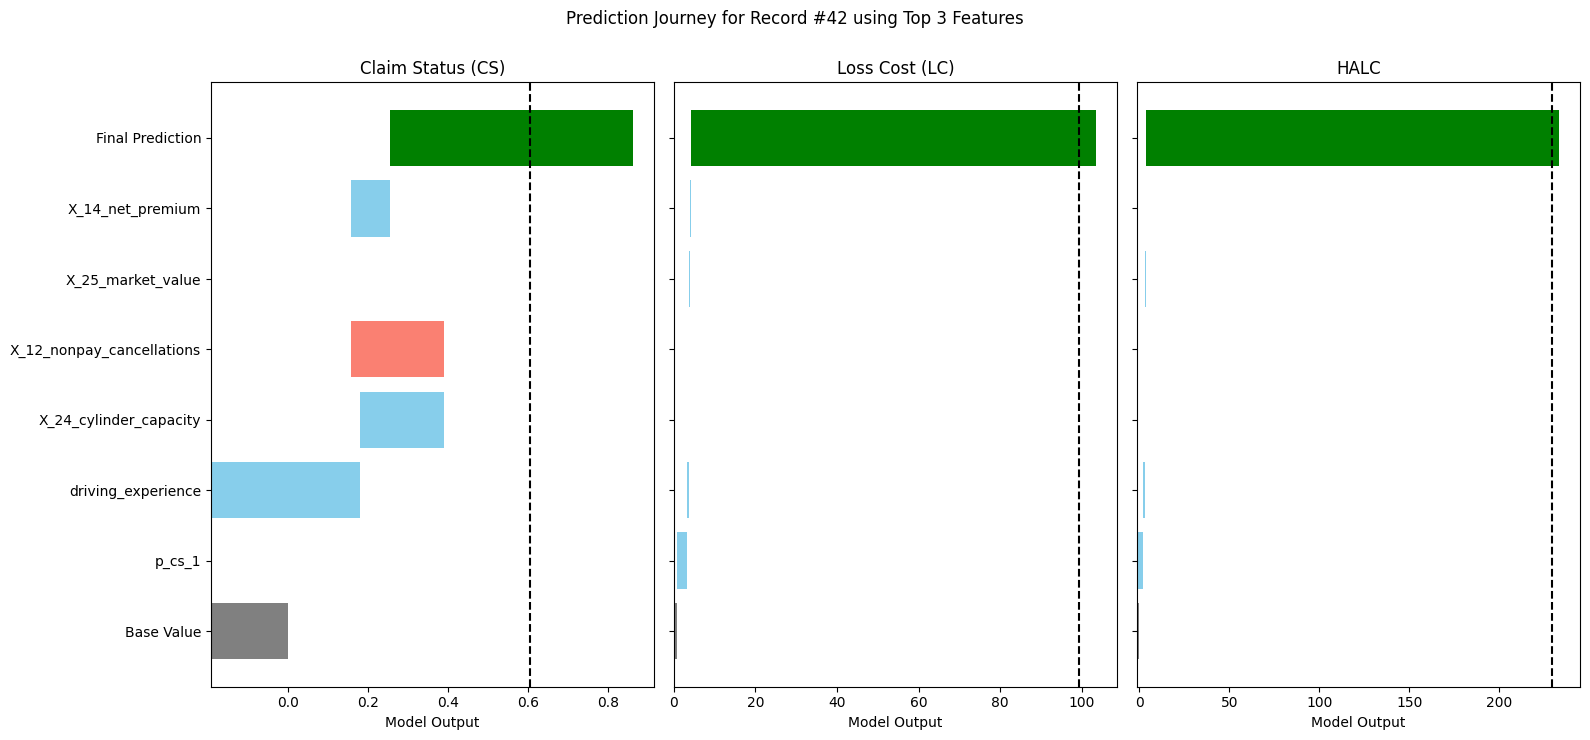

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 7), sharey=True)

models = {
    "Claim Status (CS)": (shap_cs, base_cs, pred_cs, row_cs),
    "Loss Cost (LC)": (shap_lc, base_lc, pred_lc, row_lc),
    "HALC": (shap_halc, base_halc, pred_halc, row_halc)
}

for ax, (model_name, (shap_vals, base_val, pred_val, row)) in zip(axes, models.items()):
    curr = base_val
    ax.barh("Base Value", base_val, color='gray')

    for feat in top_features:
        if feat in row.columns:
            delta = shap_vals.values[0][row.columns.get_loc(feat)]
        else:
            delta = 0
        ax.barh(feat, delta, left=curr, color='skyblue' if delta >= 0 else 'salmon')
        curr += delta

    ax.barh("Final Prediction", pred_val - curr + curr, left=curr, color='green')
    ax.set_title(model_name)
    ax.axvline(x=pred_val, linestyle="--", color="black")
    ax.set_xlabel("Model Output")

plt.tight_layout()
plt.suptitle(f"Prediction Journey for Record #{i} using Top 3 Features", y=1.05)
plt.show()

In [ ]:
feature_name = "X_14_net_premium"

shap_val_cs = shap_values_cs.values[0][row_cs.columns.get_loc(feature_name)] if feature_name in row_cs.columns else 0
shap_val_lc = shap_values_lc.values[0][row_lc.columns.get_loc(feature_name)] if feature_name in row_lc.columns else 0
shap_val_halc = shap_values_halc.values[0][row_halc.columns.get_loc(feature_name)] if feature_name in row_halc.columns else 0

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'SHAP Contribution of X_14_net_premium for Row 42')

Text(0.5, 0, 'SHAP Value (Impact on Model Output)')

Text(0.09876021892695505, 0.0, '0.0988')

Text(0.23890312525042418, 1.0, '0.2389')

Text(0.35564401258931144, 2.0, '0.3556')

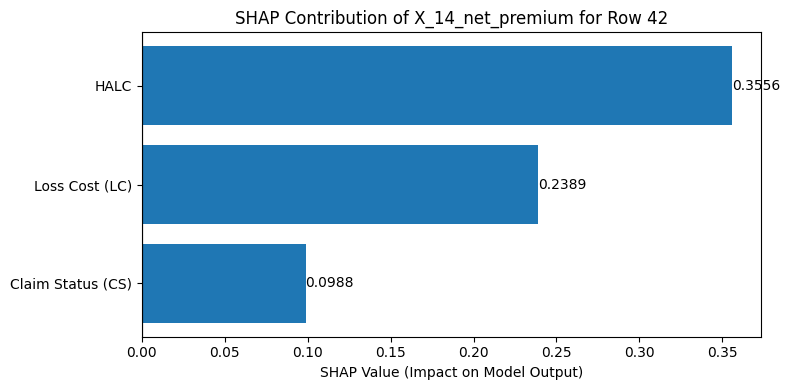

In [ ]:
import matplotlib.pyplot as plt

models = ['Claim Status (CS)', 'Loss Cost (LC)', 'HALC']
values = [shap_val_cs, shap_val_lc, shap_val_halc]

plt.figure(figsize=(8, 4))
bars = plt.barh(models, values)
plt.axvline(0, color='black', linewidth=0.8)
plt.title(f"SHAP Contribution of {feature_name} for Row {i}")
plt.xlabel("SHAP Value (Impact on Model Output)")

# Add value labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{bar.get_width():.4f}",
             va='center', ha='left' if bar.get_width() > 0 else 'right')

plt.tight_layout()
plt.show()